# TMDb Movie Data Analysis and Building a Movie Recommendation System
* # Part 2: Exploratory Data Analysis/Visualization

### In this analysis, we will explore the now-cleaned dataset, and try to gain some knowledge/insights about the movie industry, the trends/changes in it, what makes movies popular, among other things.

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import HTML
from statsmodels.graphics.boxplots import violinplot

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

## Loading the data

In [2]:
df = pd.read_csv('movies_complete.csv')
df.head()

,index,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,tagline,title,vote_average,vote_count,year,html,cast_names,crew_names,director
0,0,Blondie Collection,NaN,Comedy,3924,en,Blondie and Dagwood are about to celebrate the...,2.44,https://image.tmdb.org/t/p/w500/o6UMTE2LzQdlKV...,Columbia Pictures,United States of America,1938-11-30,NaN,70.00,English,NaN,Blondie,7.10,5,1938,<img src='https://image.tmdb.org/t/p/w500/o6UM...,Penny Singleton|Arthur Lake|Larry Simms|Daisy|...,Frank R. Strayer|Richard Flournoy,Frank R. Strayer
1,1,NaN,NaN,Adventure,6124,de,Der Mann ohne Namen is a German adventure movi...,0.60,https://image.tmdb.org/t/p/w500/6xUbUCvndklbGV...,NaN,Germany,1921-01-01,NaN,420.00,NaN,NaN,"Peter Voss, Thief of Millions",NaN,0,1921,<img src='https://image.tmdb.org/t/p/w500/6xUb...,Harry Liedtke|Georg Alexander|Mady Christians|...,Robert Liebmann|Frederik Fuglsang|Georg Jacoby...,Georg Jacoby
2,2,NaN,NaN,Drama|Romance,8773,fr,Love at Twenty unites five directors from five...,4.99,https://image.tmdb.org/t/p/w500/aup2QCYCsyEeQf...,Ulysse Productions|Unitec Films|Cinesecolo|Toh...,Germany|France|Italy|Japan|Poland,1962-06-22,NaN,110.00,Deutsch|Français|Italiano|日本語|Polski,The Intimate Secrets of Young Lovers,Love at Twenty,6.80,36,1962,<img src='https://image.tmdb.org/t/p/w500/aup2...,Jean-Pierre Léaud|Marie-France Pisier|Patrick ...,François Truffaut|François Truffaut|Gérard Bra...,François Truffaut
3,3,New World Disorder,NaN,NaN,25449,en,Gee Atherton ripping the Worlds course the day...,1.34,https://image.tmdb.org/t/p/w500/okQY6jVmRU19CU...,NaN,NaN,2008-12-08,NaN,69.00,English,NaN,New World Disorder 9: Never Enough,4.50,2,2008,<img src='https://image.tmdb.org/t/p/w500/okQY...,Darren Berrecloth|Cameron McCaul|Paul Basagoit...,Derek Westerlund,Derek Westerlund
4,4,NaN,NaN,Family,31975,en,"Elmo is making a very, very super special surp...",0.60,https://image.tmdb.org/t/p/w500/qKWcCmvGr4g0dg...,NaN,NaN,2010-01-05,NaN,46.00,NaN,NaN,Sesame Street: Elmo Loves You!,NaN,0,2010,<img src='https://image.tmdb.org/t/p/w500/qKWc...,NaN,NaN,NaN


In [3]:
df.columns

Index(['index', 'belongs_to_collection', 'budget_musd', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue_musd', 'runtime', 'spoken_languages', 'tagline', 'title',
       'vote_average', 'vote_count', 'year', 'html', 'cast_names',
       'crew_names', 'director'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578044 entries, 0 to 578043
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  578044 non-null  int64  
 1   belongs_to_collection  15891 non-null   object 
 2   budget_musd            24897 non-null   float64
 3   genres                 425057 non-null  object 
 4   id                     578044 non-null  int64  
 5   original_language      578044 non-null  object 
 6   overview               496805 non-null  object 
 7   popularity             578044 non-null  float64
 8   poster_path            420708 non-null  object 
 9   production_companies   273625 non-null  object 
 10  production_countries   377206 non-null  object 
 11  release_date           556155 non-null  object 
 12  revenue_musd           13607 non-null   float64
 13  runtime                474096 non-null  float64
 14  spoken_languages       370286 non-nu

In [5]:
df.describe()

,index,budget_musd,id,popularity,revenue_musd,runtime,vote_average,vote_count
count,578044.00,24897.00,578044.00,578044.00,13607.00,474096.00,256163.00,578044.00
mean,315812.41,10.34,453308.18,1.80,48.40,278.87,6.07,28.93
std,187057.84,41.29,250687.94,15.98,132.40,103408.88,1.77,373.26
min,0.00,0.00,2.00,0.60,0.00,1.00,0.00,0.00
25%,150207.75,0.03,259484.75,0.60,0.60,19.00,5.00,0.00
50%,314801.50,0.81,457508.50,0.60,5.90,75.00,6.00,0.00
75%,475333.25,7.30,664758.25,1.20,34.26,95.00,7.00,2.00
max,650254.00,5000.00,890932.00,6121.12,2847.25,50505050.00,10.00,30136.00


# Distributions of the Numeric Attributes
### In this section, we will look at the histograms and boxplots for each appropriate numeric attribute, and remove any outliers if necessary.

In [6]:
# Creating a function to plot the histogram and boxplot distributions of a numeric attribute.
def hist_boxplot(column, title_insert=None):
    
    mean = np.mean(df[column])
    median = np.nanmedian(df[column])
    st_dev = np.std(df[column])
    min_ = np.min(df[column])
    max_ = np.max(df[column])
    q1 = np.nanquantile(df[column], 0.25)
    q3 = np.nanquantile(df[column], 0.75)
    iqr = q3 - q1
    skew = stats.skew(df[column], nan_policy='omit')
    kurtosis = stats.kurtosis(df[column], nan_policy='omit')
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    if title_insert:
        fig.suptitle(f'Distribution of {title_insert}', fontsize=35, fontweight='semibold', y=1.05)
    else:
        fig.suptitle(f'Distribution of "{column}"', fontsize=35, fontweight='semibold', y=1.05)
    
    sns.distplot(df[column], ax=ax1, kde=False)
    ax1.set_title('Histogram', fontsize=25)
    ax1.legend([f"μ= {np.round(mean,2)}\nσ= {np.round(st_dev,2)}\nSkew= {np.round(skew,2)}\nKurtosis= {np.round(kurtosis,2)}"], fontsize=15,handlelength=0, handletextpad=0)
    ax1.tick_params(labelsize=12)
    ax1.set_xlabel(column, fontsize=15)
    ax1.set_ylabel('Count', fontsize=15)
    
    sns.boxplot(df[column], ax=ax2)
    ax2.set_title('Boxplot', fontsize=25)
    ax2.legend([f"Min= {np.round(min_,4)}\nQ1= {np.round(q1,4)}\nMedian= {np.round(median,4)}\nQ3= {np.round(q3,4)}\nIQR= {np.round(iqr,4)}\nMax= {np.round(max_,4)}"], fontsize=15,handlelength=0, handletextpad=0)
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel(column, fontsize=15)
    fig.tight_layout()
    return plt.show()

In [10]:
# Creating a function to replace outliers in the dataset with NaN
def remove_outliers(column, limit):
    df.loc[df[column] >= limit, column] = np.nan


# Creating a function to display rows above a certain attribute threshold
def show_outliers(column, limit):
    return HTML(df.loc[df[column] > limit, ['html', 'id', 'title', column]].sort_values(by=column, ascending=False).to_html(escape=False))

## • budget_musd

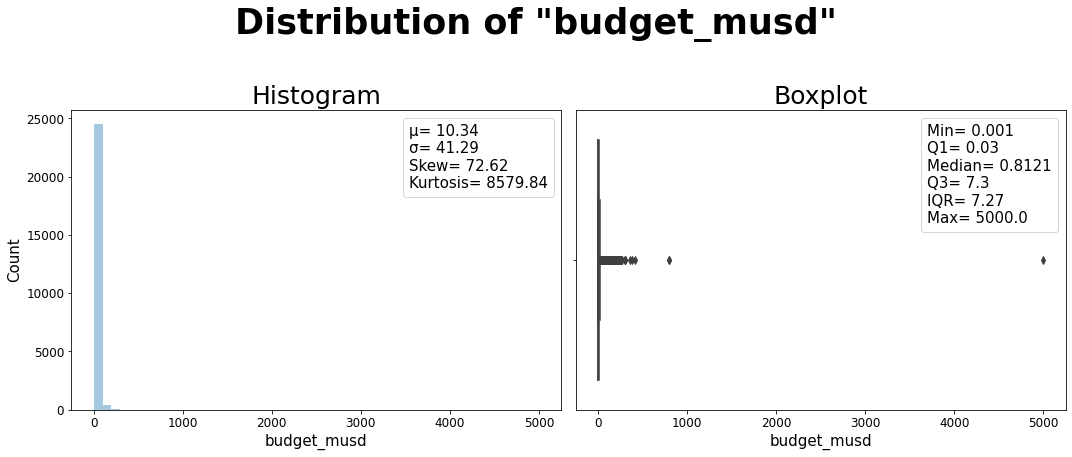

In [11]:
hist_boxplot('budget_musd')

### • The distribution of the "budget_musd" column is heavily right-skewed due to the presence of outliers. 

In [12]:
show_outliers('budget_musd', 300)

,html,id,title,budget_musd
498231,NaN,761770,Humor Us! Presents: SOCIAL DISSOCIATION,5000.00
489360,NaN,747982,Smiles For Miles,800.00
495549,NaN,757658,Ex-Wife,800.00
574812,,886156,Wake Me Up When September Ends,420.00
1243,,1865,Pirates of the Caribbean: On Stranger Tides,380.00
175468,,299534,Avengers: Endgame,356.00


In [13]:
# Budgets above 420 million USD will be set to NaN
remove_outliers('budget_musd', 400)

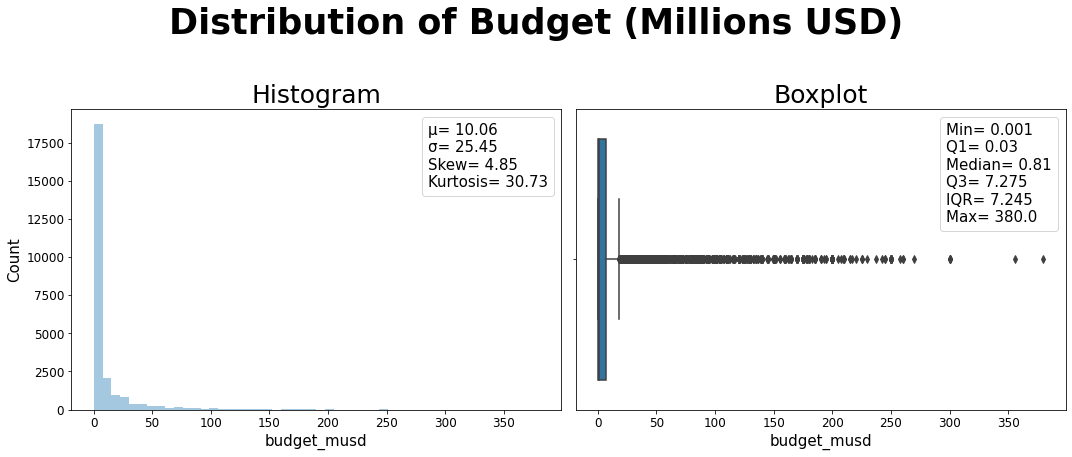

In [14]:
hist_boxplot('budget_musd', 'Budget (Millions USD)')

## • popularity

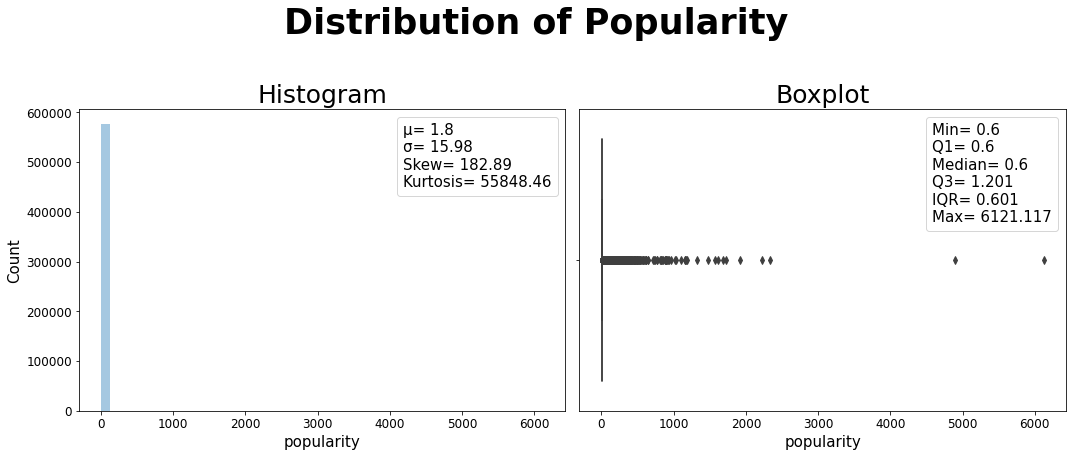

In [15]:
hist_boxplot('popularity', 'Popularity')

### • The distribution of the "popularity" column is also heavily right-skewed due to the presence of outliers. 

In [16]:
show_outliers('popularity', 2000)

,html,id,title,popularity
376183,,580489,Venom: Let There Be Carnage,6121.12
275348,,438631,Dune,4893.62
357053,,550988,Free Guy,2334.62
396885,,610253,Halloween Kills,2223.22


### • All of the outliers seem to indicate really successful movies rather than bad data. Outliers will not be removed in this case.

## • revenue_musd

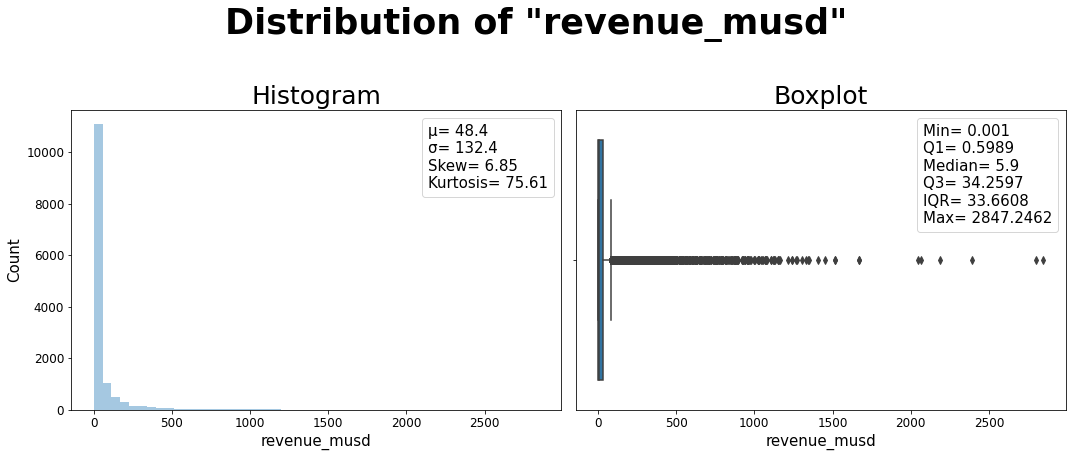

In [17]:
hist_boxplot('revenue_musd')

### • The distribution of the "revenue_musd" column is also heavily right-skewed due to the presence of outliers. 

In [18]:
show_outliers('revenue_musd', 1500)

,html,id,title,revenue_musd
12036,,19995,Avatar,2847.25
175468,,299534,Avengers: Endgame,2797.80
560181,NaN,860818,Duckava: The movie,2389.34
476,,597,Titanic,2187.46
87078,,140607,Star Wars: The Force Awakens,2068.22
175470,,299536,Avengers: Infinity War,2046.24
84741,,135397,Jurassic World,1671.71
262185,,420818,The Lion King,1667.64
14385,,24428,The Avengers,1518.82
99025,,168259,Furious 7,1515.05


### • Same as with the "popularity" attribute, outliers here seem appropriate.

In [28]:
df[df.title == 'Duckava: The movie']

,index,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,tagline,title,vote_average,vote_count,year,html,cast_names,crew_names,director
560181,627620,NaN,29.39,NaN,860818,en,She is the awesomest girl in the world and bet...,0.60,NaN,NaN,NaN,NaN,2389.34,4.00,NaN,Bro,Duckava: The movie,NaN,0,NaT,NaN,NaN,NaN,NaN


In [29]:
df.drop(df[df.title == 'Duckava: The movie'].index[0], axis=0, inplace=True)

## • Profit

In [30]:
# Creating profit and return on investment columns for the dataset
df["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df["return_musd"] = df.revenue_musd.div(df.budget_musd)

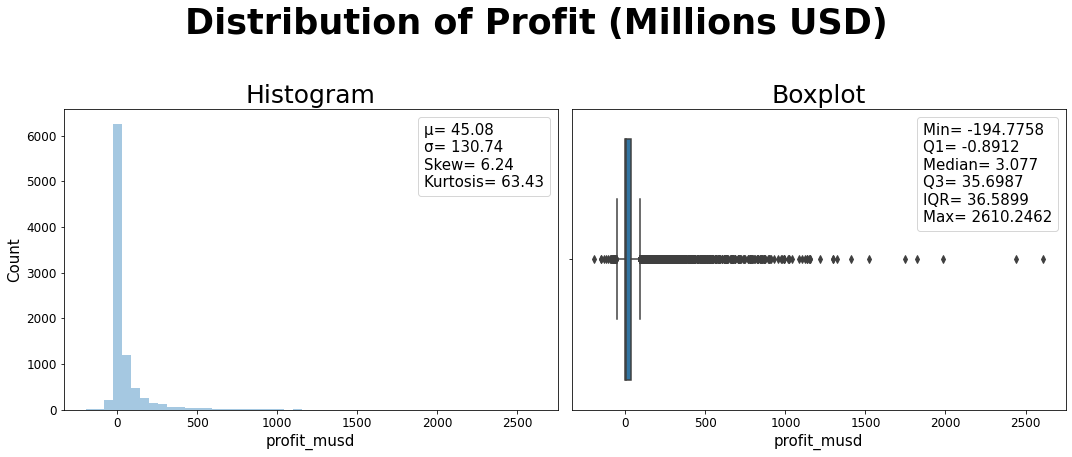

In [31]:
hist_boxplot('profit_musd', 'Profit (Millions USD)')

In [34]:
show_outliers('profit_musd', 1600)

,html,id,title,profit_musd
12036,,19995,Avatar,2610.25
175468,,299534,Avengers: Endgame,2441.80
476,,597,Titanic,1987.46
87078,,140607,Star Wars: The Force Awakens,1823.22
175470,,299536,Avengers: Infinity War,1746.24


### • Nothing out of place with "profit_musd" as well.

## • Return on Investment

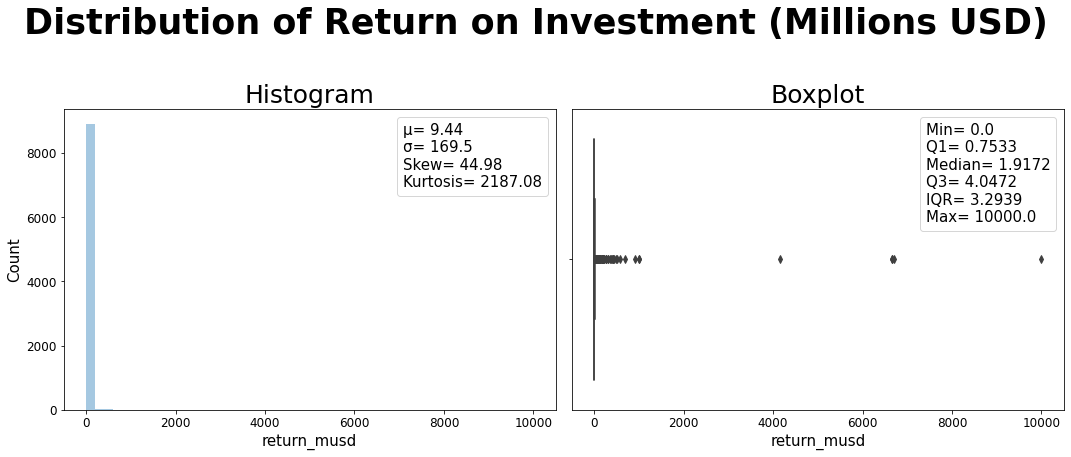

In [35]:
hist_boxplot('return_musd', 'Return on Investment (Millions USD)')

In [36]:
show_outliers('return_musd', 4000)

,html,id,title,return_musd
391237,NaN,602324,Jeannette Sousa,10000.00
313477,NaN,491067,BURNER,6700.00
325062,,506972,Khaltoor,6666.67
330141,,513434,One Cut of the Dead,6666.67
1791,,2667,The Blair Witch Project,4143.98


In [38]:
df[df.title.isin(['Jeannette Sousa', 'BURNER'])]

,index,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,tagline,title,vote_average,vote_count,year,html,cast_names,crew_names,director,profit_musd,return_musd
313477,341089,NaN,0.00,NaN,491067,en,"""A NEIGHBORHOOD BRAWL LEAVES SAM WITH A BRUISE...",0.60,NaN,NaN,NaN,NaN,6.70,NaN,NaN,NaN,BURNER,NaN,0,NaT,NaN,NaN,NaN,NaN,6.70,6700.00
391237,428082,NaN,0.00,NaN,602324,en,Jeannette Sousa is an actress and executive,0.60,NaN,NaN,NaN,NaN,10.00,1.00,NaN,Jeannette Sousa,Jeannette Sousa,NaN,0,NaT,NaN,NaN,NaN,NaN,10.00,10000.00


In [43]:
# Removing the invalid entries
df.drop(df[df.title.isin(['Jeannette Sousa', 'BURNER'])].index, axis=0, inplace=True)

## • runtime
### In order to have a better understanding of the distribution of "runtime", we will create a new attribute by changing its scale from minutes to hours.

In [44]:
df['runtime_hours'] = np.floor(df.runtime / 60)

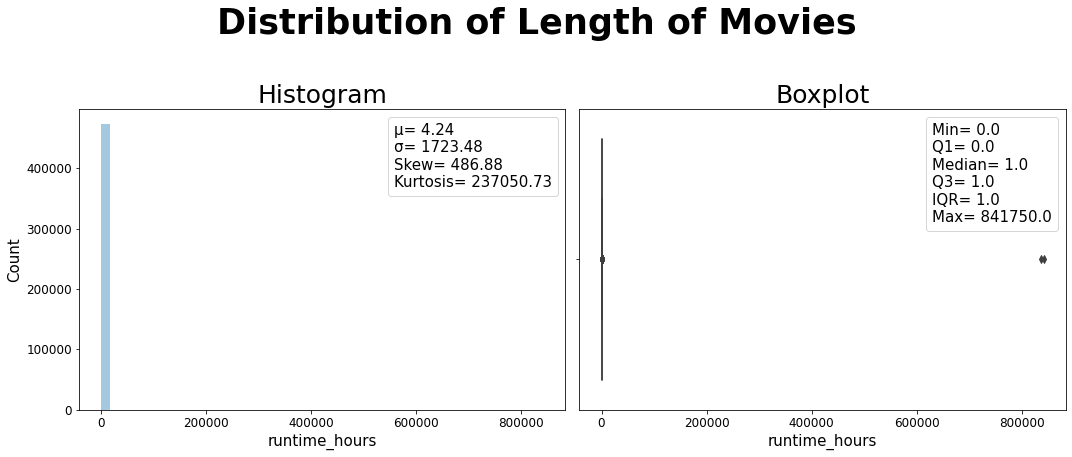

In [45]:
hist_boxplot('runtime_hours', 'Length of Movies')

### • The distribution of the "runtime" column is also heavily right-skewed due to the presence of outliers. 

In [46]:
show_outliers('runtime', 60000)

,html,id,title,runtime
431184,,660968,Mr Marcus FriendPop Facebook Adventures,50505050.00
431185,,660969,Mr Marcus FriendBoop Facebook Adventures,50189181.00


In [47]:
df[df.title.isin(['Mr Marcus FriendPop Facebook Adventures', 'Mr Marcus FriendBoop Facebook Adventures'])]

,index,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,tagline,title,vote_average,vote_count,year,html,cast_names,crew_names,director,profit_musd,return_musd,runtime_hours
431184,472657,NaN,NaN,NaN,660968,en,Part 1 of 3,1.09,https://image.tmdb.org/t/p/w500/d8MlC4EQwd3nwu...,NaN,NaN,NaN,NaN,50505050.00,NaN,Funny Mark Boy Zuckerberg Forcefield Guy Funny...,Mr Marcus FriendPop Facebook Adventures,NaN,0,NaT,<img src='https://image.tmdb.org/t/p/w500/d8Ml...,NaN,NaN,NaN,NaN,NaN,841750.00
431185,472658,NaN,NaN,NaN,660969,en,Part 2 of 3,0.60,https://image.tmdb.org/t/p/w500/s3jek8ir32mYNe...,NaN,NaN,NaN,NaN,50189181.00,NaN,Funny Mark Boy Zuckerberg Forcefield Guy Funny...,Mr Marcus FriendBoop Facebook Adventures,NaN,0,NaT,<img src='https://image.tmdb.org/t/p/w500/s3je...,NaN,NaN,NaN,NaN,NaN,836486.00


In [49]:
# Removing the invalid entries
df.drop(df[df.title.isin(['Mr Marcus FriendPop Facebook Adventures', 'Mr Marcus FriendBoop Facebook Adventures'])].index, axis=0, inplace=True)

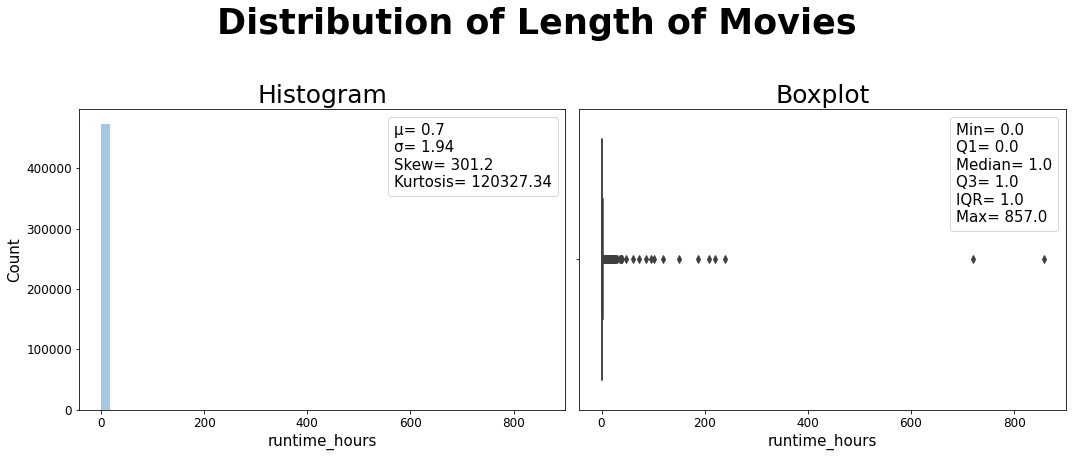

In [50]:
df['runtime_hours'] = np.floor(df.runtime / 60)
hist_boxplot('runtime_hours', 'Length of Movies')

## • vote_average

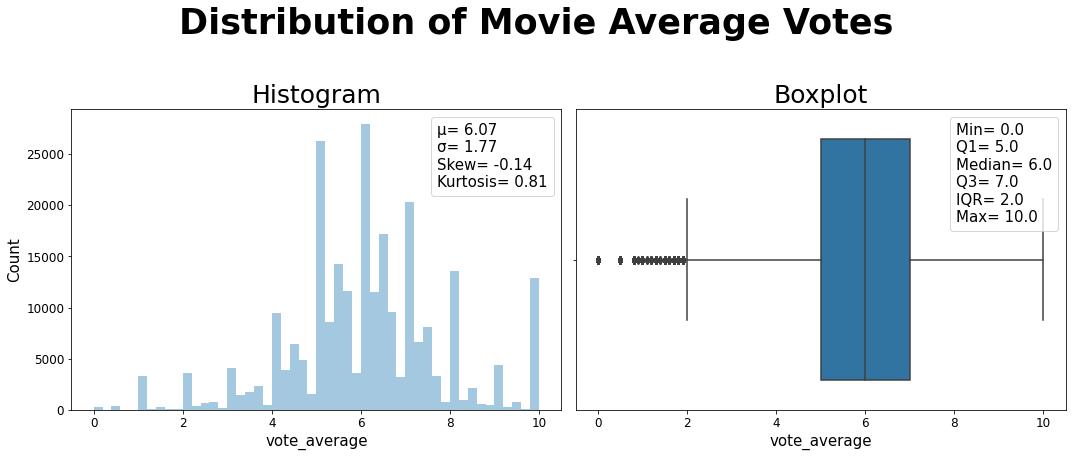

In [51]:
hist_boxplot('vote_average', 'Movie Average Votes')

### • "vote_average" has a slightly left-skewed Gaussian-like distribution.
### • Since all values are within 0 to 10, none will be treated as outliers.

## • vote_count

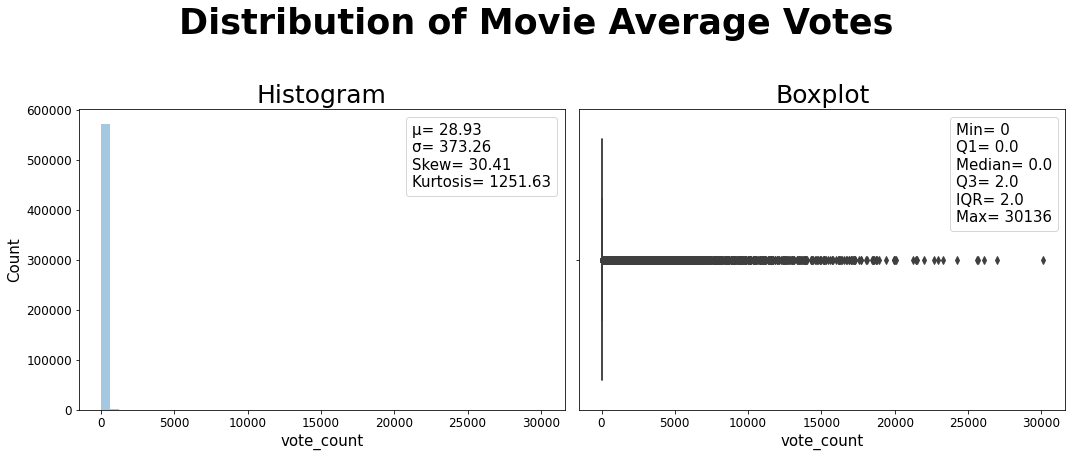

In [52]:
hist_boxplot('vote_count', 'Movie Average Votes')

### • "vote_count" has a heavily right-skewed distribution.
### • Although this distribution seems to have extreme outliers to the right of the distribution, popular movies are to be expected to have an exponentially higher number of votes than other less-popular movies.

In [54]:
show_outliers('vote_count', 25000)

,html,id,title,vote_count
16277,,27205,Inception,30136
94263,,157336,Interstellar,26950
121,,155,The Dark Knight,26099
170974,,293660,Deadpool,25697
14385,,24428,The Avengers,25602


## • year

In [55]:
df.loc[df.year == 'NaT', 'year'] = np.nan
df.year = df.year.astype(float)

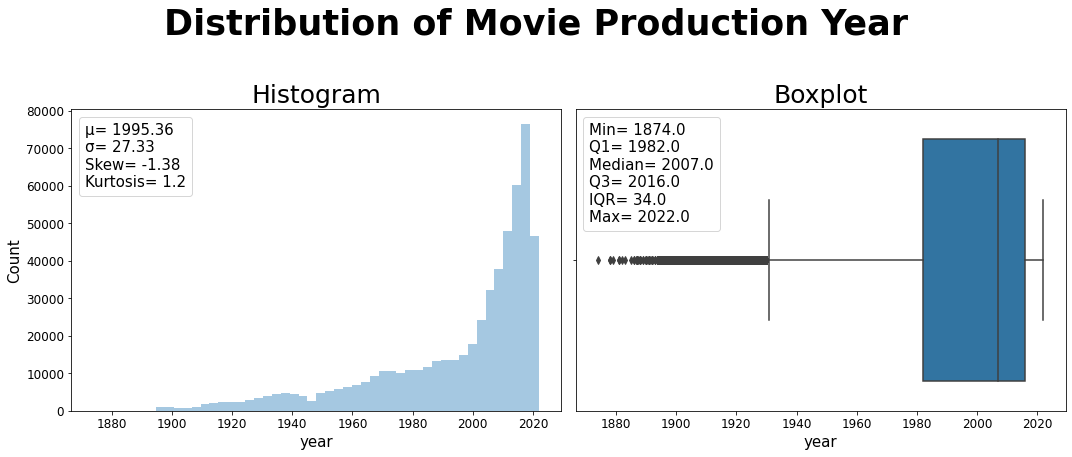

In [56]:
hist_boxplot('year', 'Movie Production Year')

### • The distribution of year of release is skewed to the left. 
### • As filming technology and barriers of entry have eased over the years/decades, the amount of movies produced year by year has increased.

# Analysis of Non-Numeric Attributes

In [58]:
df.describe(include='object')

,belongs_to_collection,genres,original_language,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,tagline,title,html,cast_names,crew_names,director
count,15891,425057,578039,496800,420706,273625,377206,556155,370286,90466,578039,420706,413841,502382,494305
unique,4368,10483,160,488377,418742,132799,8313,39779,5190,88010,503582,418742,391910,416134,177237
top,Our Gang: The Roach/MGM talkies,Documentary,en,Mexican feature film,https://image.tmdb.org/t/p/w500/cWjdh8VTiizYfQ...,Metro-Goldwyn-Mayer,United States of America,2010-01-01,English,animation short,Home,<img src='https://image.tmdb.org/t/p/w500/cWjd...,Mel Blanc,Stan Brakhage,Dave Fleischer
freq,80,77314,312717,799,48,1963,93909,2039,126205,130,89,48,304,317,484


In [59]:
# Creating a function to plot the top 10 values by count
def plot_top_10(data, title='Top 10', explode=False, x_axis_add=0):
    if explode:
        data = data.apply(lambda x: x.split('|') if type(x) == str else x)
        data = data.explode()
    top_10 = data.value_counts(sort=True, ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(15,8))
    sns.barplot(top_10.values, top_10.index, ax=ax, orient='h')
    for i in range(len(top_10)):
        ax.text(top_10.values[i]+1, i+0.05, format(top_10.values[i], ',d'), fontsize=15, fontweight='semibold')
    #ax.set_title(title, fontsize=30)
    fig.suptitle(title, fontsize=30, fontweight='semibold')
    ax.set_xlabel('Count', fontsize=20)
    ax.tick_params(labelsize=15)
    ax.set_xlim(0, ax.get_xlim()[1] + x_axis_add)
    fig.tight_layout()
    return plt.show()

## Top 10 Most Common Movie Names

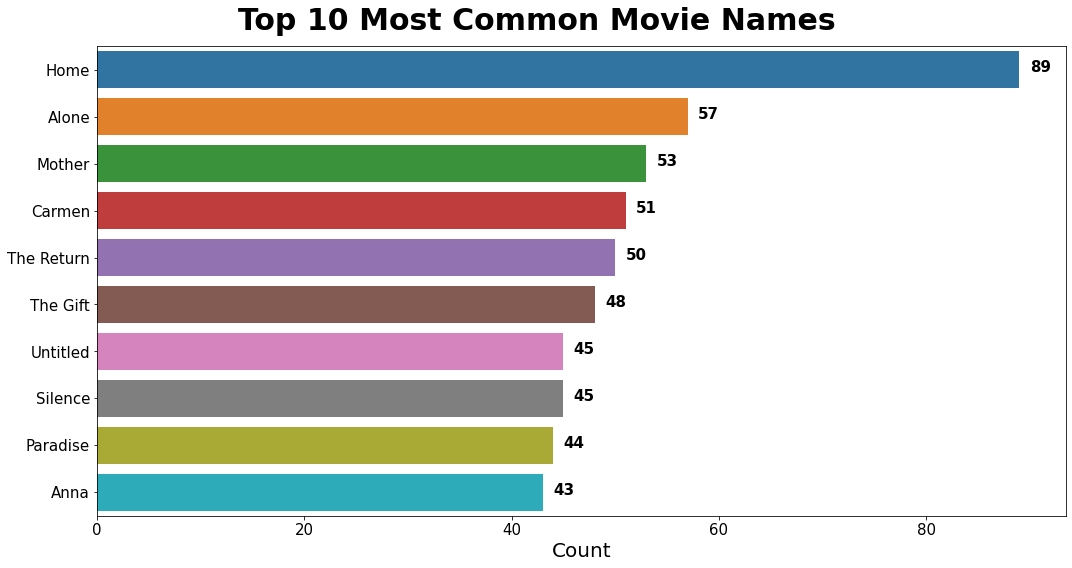

In [60]:
plot_top_10(df.title, 'Top 10 Most Common Movie Names')

### • "Cinderella" is the most frequent title for a movie, appearing a total of 89 times in this dataset.

## Top 10 Genres

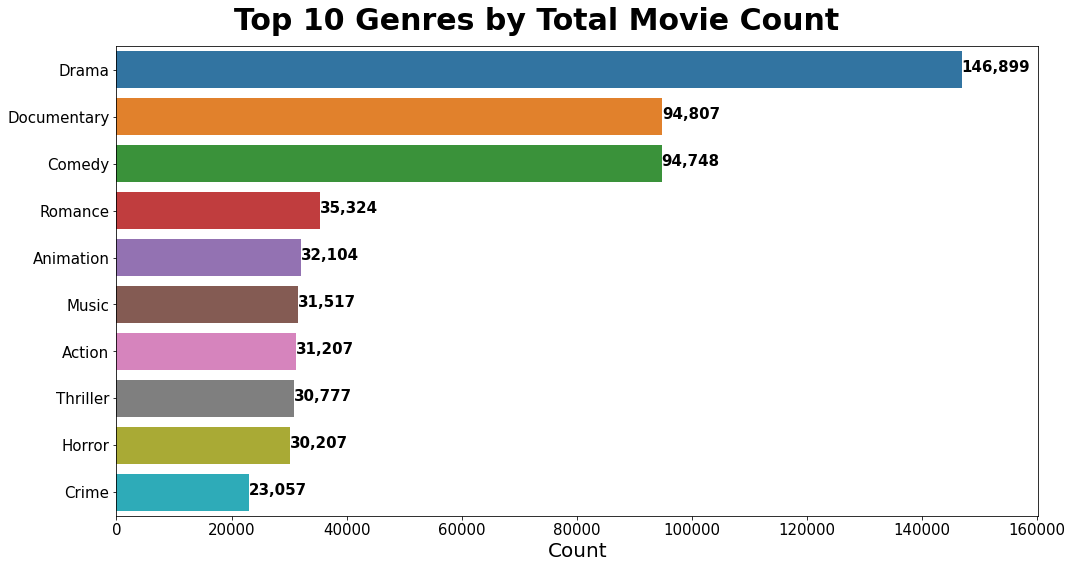

In [61]:
plot_top_10(df.genres, 'Top 10 Genres by Total Movie Count', explode=True, x_axis_add=6000)

### • "Drama" is the most frequent genre in the dataset, followed by "Documentary" and "Comedy".

## Top 10 Movie Collections

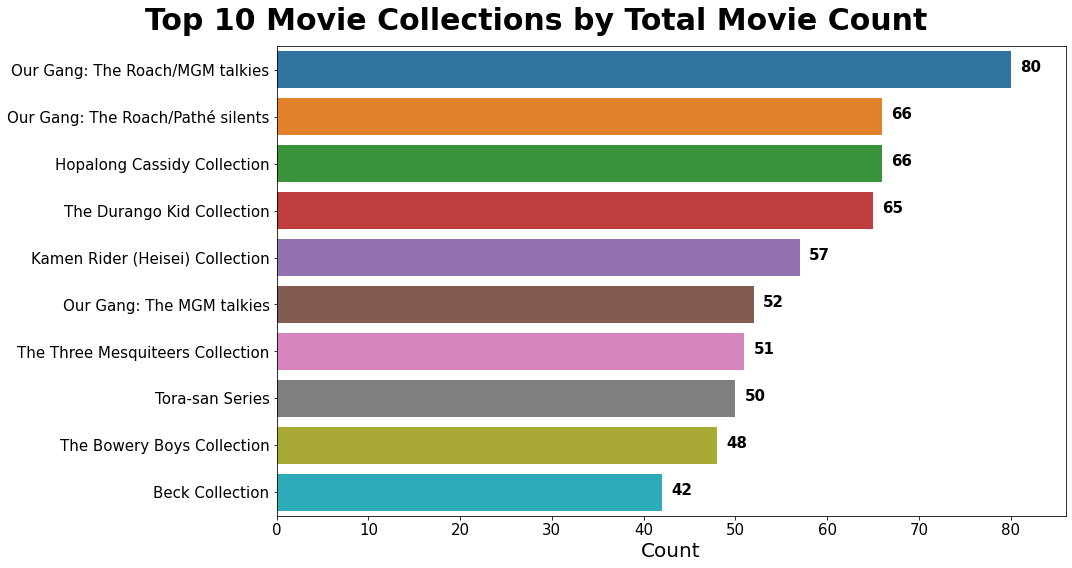

In [62]:
plot_top_10(df.belongs_to_collection, 'Top 10 Movie Collections by Total Movie Count', x_axis_add=2)

### • The biggest movie collections contain 1920s/1930s short films which were either silent films or "talkies".

## Top 10 Production Companies

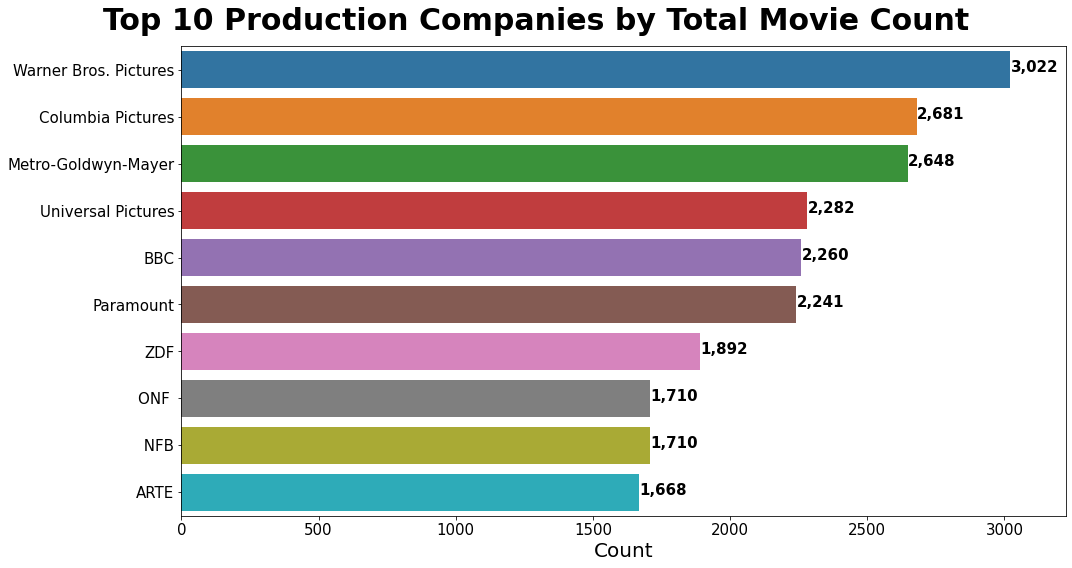

In [63]:
plot_top_10(df.production_companies, 'Top 10 Production Companies by Total Movie Count', explode=True, x_axis_add=50)

### • Metro-Goldwyn-Mayer is the production company with the highest count of movies produced, followed by Columbia Pictures and Warner Bros. Pictures.

## Top 10 Production Countries

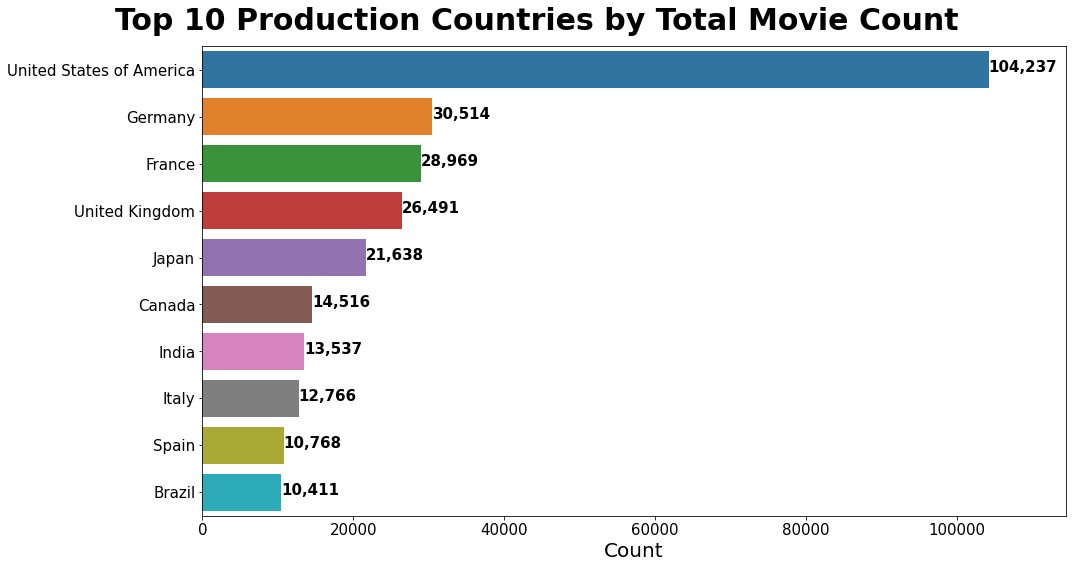

In [64]:
plot_top_10(df.production_countries, 'Top 10 Production Countries by Total Movie Count', explode=True, x_axis_add=5000)

### • By far, the most frequent production company is the United States, as would be expected due to the influence of Hollywood on film-making.

## Top 10 Directors

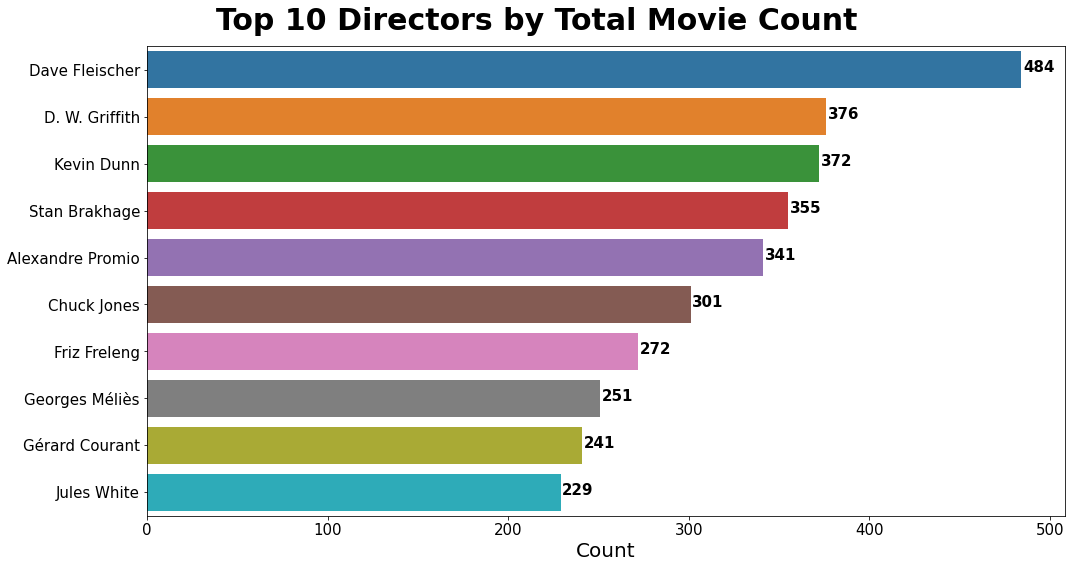

In [65]:
plot_top_10(df.director, 'Top 10 Directors by Total Movie Count')

### • The most active director is "Dave Fleischer", followed by "D.W. Griffith" and "Kevin Dunn".

## Top 10 Actors

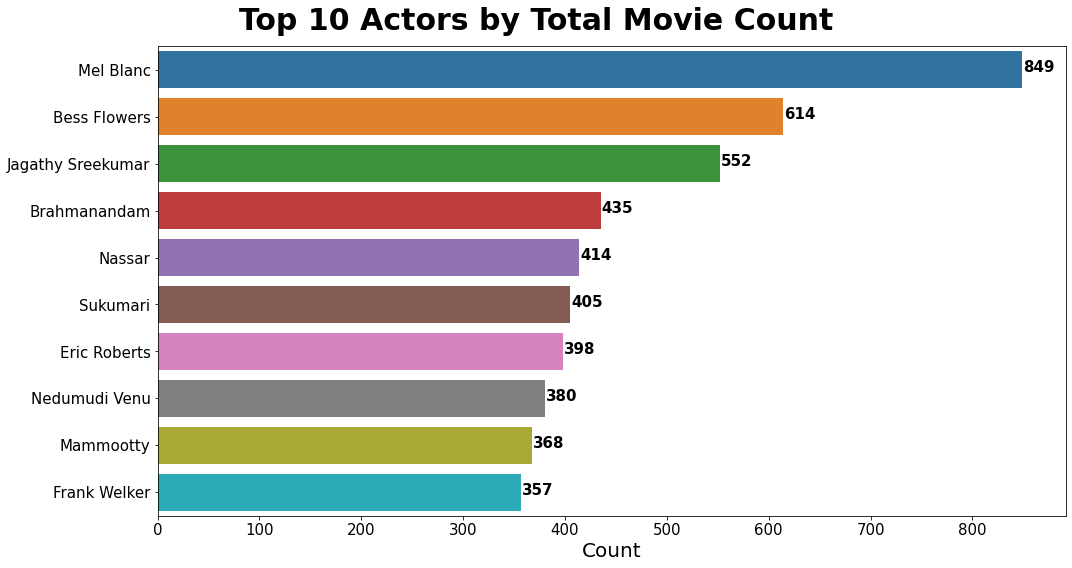

In [66]:
plot_top_10(df.cast_names, 'Top 10 Actors by Total Movie Count', explode=True)

### • The most active actor is "Mel Blanc", followed by "Bess Flowers" and "Jagathy Sreekumar"

# What Are The Most Successful Movies?
### • In this section, we will compare movies based on revenue, budget, ROI, profit, average rating, vote count, and popularity.

In [67]:
# Creating a function to find best/worst movies
def best_worst(n, by, ascending=False, min_bud=0, min_votes=0):
    df2 = df.loc[(df['budget_musd'] >= min_bud) & (df['vote_count'] >= min_votes),
                     ['title','html',by]].sort_values(by=by, ascending=ascending).head(n).set_index('title').copy()
    return HTML(df2.to_html(escape=False))



## Top 10 Movies with Highest Revenue

In [68]:
best_worst(10,'revenue_musd', min_bud=5)

,html,revenue_musd
title,,
Avatar,,2847.25
Avengers: Endgame,,2797.80
Titanic,,2187.46
Star Wars: The Force Awakens,,2068.22
Avengers: Infinity War,,2046.24
Jurassic World,,1671.71
The Lion King,,1667.64
The Avengers,,1518.82
Furious 7,,1515.05


## Top 10 Movies with Highest Budget

In [70]:
best_worst(10,'budget_musd')

,html,budget_musd
title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Avengers: Endgame,,356.00
Avengers: Infinity War,,300.00
Pirates of the Caribbean: At World's End,,300.00
Mega Man X: The Day of Sigma,,300.00
Justice League,,300.00
Superman Returns,,270.00
The Lion King,,260.00
Tangled,,260.00


## Top 10 Movies with Highest Profit

In [71]:
best_worst(10,'profit_musd', min_bud=5)

,html,profit_musd
title,,
Avatar,,2610.25
Avengers: Endgame,,2441.80
Titanic,,1987.46
Star Wars: The Force Awakens,,1823.22
Avengers: Infinity War,,1746.24
Jurassic World,,1521.71
The Lion King,,1407.64
Furious 7,,1325.05
Frozen II,,1300.03


## Top 10 Movies with Lowest Profit

In [74]:
best_worst(10,'profit_musd',True, min_bud=5)

,html,profit_musd
title,,
Messengers,,-194.78
The Irishman,,-151.00
Luca,,-150.99
Mulan,,-133.20
The Alamo,,-119.18
Mars Needs Moms,,-111.01
The 13th Warrior,,-98.30
The Adventures of Pluto Nash,,-92.90
Cutthroat Island,,-87.98


## Top 10 Movies with Highest Return on Investment

In [75]:
best_worst(10,'return_musd',min_bud=5)

,html,return_musd
title,,
Operation Thunderbolt,,207.40
Hamood Habibi,,100.00
aflam Movie Title,NaN,100.00
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64
The Exorcist,,55.16


In [76]:
df.drop(df[df.title == 'aflam Movie Title'].index[0], axis=0, inplace=True)

## Top 10 Movies with Most Votes

In [77]:
best_worst(10,'vote_count')

,html,vote_count
title,,
Inception,,30136
Interstellar,,26950
The Dark Knight,,26099
Deadpool,,25697
The Avengers,,25602
Avatar,,24229
Guardians of the Galaxy,,23290
Avengers: Infinity War,,22979
Fight Club,,22711


## Top 10 Movies with Highest Rating (Min Votes = 5000)

In [78]:
best_worst(10,'vote_average',min_votes=5000)

,html,vote_average
title,,
The Godfather,,8.70
The Shawshank Redemption,,8.70
The Godfather: Part II,,8.60
Schindler's List,,8.60
The Green Mile,,8.50
Life Is Beautiful,,8.50
The Dark Knight,,8.50
The Lord of the Rings: The Return of the King,,8.50
GoodFellas,,8.50


## Top 10 Movies with Lowest Rating(Min Votes = 5000)

In [79]:
best_worst(10,'vote_average',ascending=True,min_votes=5000)

,html,vote_average
title,,
Green Lantern,,5.20
After Earth,,5.20
Independence Day: Resurgence,,5.20
A Good Day to Die Hard,,5.30
Jupiter Ascending,,5.40
Ghostbusters,,5.40
Assassin's Creed,,5.40
The Mummy,,5.50
Noah,,5.60


## Top 10 Movies by Popularity

In [80]:
best_worst(10,'popularity', min_votes=1000)

,html,popularity
title,,
Venom: Let There Be Carnage,,6121.12
Dune,,4893.62
Free Guy,,2334.62
Halloween Kills,,2223.22
Coco,,1916.33
Venom,,1568.26
Shang-Chi and the Legend of the Ten Rings,,1158.57
The Suicide Squad,,941.32
The Boss Baby: Family Business,,914.18


# Are Franchises More Successful than Stand-alone Movies?
### • In this section, we will compare franchises and stand-alone movies based on revenue, ROI, budget, popularity, and vote average.

In [83]:
df['Franchise'] = df.belongs_to_collection.notna()
df['Franchise'] = df.Franchise.map({True: 'Franchise', False: 'Stand-alone'})
df['Franchise']

0           Franchise
1         Stand-alone
2         Stand-alone
3           Franchise
4         Stand-alone
             ...     
578039    Stand-alone
578040    Stand-alone
578041    Stand-alone
578042    Stand-alone
578043    Stand-alone
Name: Franchise, Length: 578038, dtype: object

In [84]:
df.Franchise.value_counts()

Stand-alone    562147
Franchise       15891
Name: Franchise, dtype: int64

In [85]:
# Creating a function to create histogram and violin plot figures.
def hist_violin(column, title, xlabel, bins=40, lim_max=None):
    data1 = df.loc[df.Franchise == 'Franchise', column]
    data2 = df.loc[df.Franchise == 'Stand-alone', column]
    data1_mean = np.round(data1.mean(),2)
    data2_mean = np.round(data2.mean(),2)
    data1_std = np.round(data1.std(),2)
    data2_std = np.round(data2.std(),2)

    pie_group = df.groupby('Franchise')[column].mean()
    fig = plt.figure(figsize=(15,6))
    fig.suptitle(title, fontsize=40, fontweight='semibold', y=1.01)
    ax1 = plt.subplot2grid((1,5), (0,0), colspan=3)
    ax2 = plt.subplot2grid((1,5), (0,3), colspan=2)

    

    sns.distplot(data1, ax=ax1, bins=bins, label=f"μ= {data1_mean}\nσ= {data1_std}")
    sns.distplot(data2, ax=ax1, bins=bins, label=f"μ= {data2_mean}\nσ= {data2_std}")
    ax1.set_title('Histogram', fontsize=30)
    ax1.tick_params(labelsize=15)
    ax1.set_xlabel(xlabel, fontsize=20)
    ax1.legend(fontsize=15)

    violinplot([data1.dropna()], ax=ax2, positions=[0], show_boxplot=False, side='left', plot_opts={'violin_fc':'C0'})
    violinplot([data2.dropna()], ax=ax2, positions=[0], show_boxplot=False, side='right', plot_opts={'violin_fc':'C1'})
    ax2.set_xticks([])
    ax2.tick_params(labelsize=15)
    ax2.set_title('Violin Plot', fontsize=30)

    if lim_max:
        ax1.set_xlim(ax1.get_xlim()[0], lim_max)
        ax2.set_ylim(ax2.get_ylim()[0], lim_max)

    
    fig.tight_layout()
    #fig.legend(['Franchise', 'Standalone'], loc='lower right', fontsize=20)
    fig.legend(['Franchise', 'Standalone'], bbox_to_anchor=(.9, .1), loc=2, borderaxespad=0., fontsize=20)
    plt.show()


## Franchise vs. Stand-alone: Movie Revenue

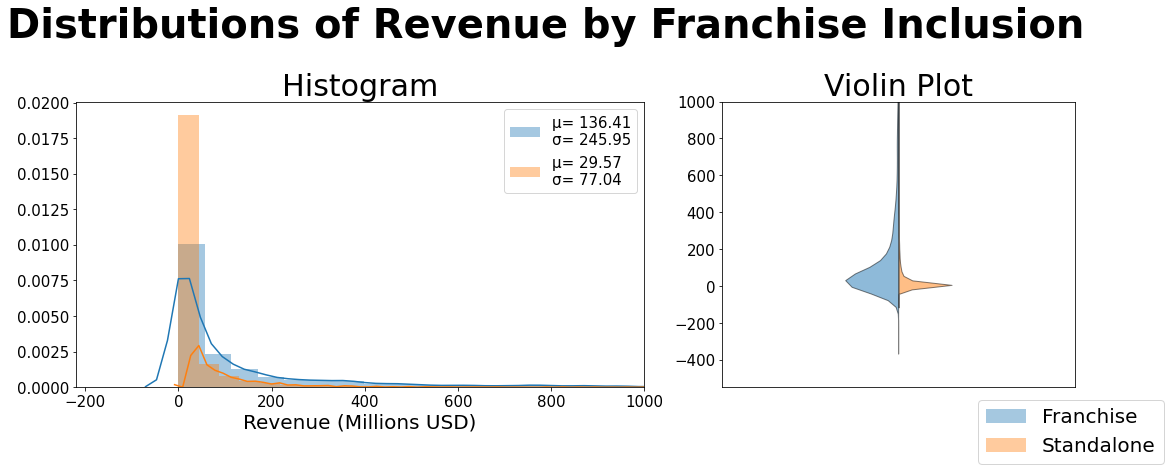

In [86]:
hist_violin('revenue_musd', 'Distributions of Revenue by Franchise Inclusion', 'Revenue (Millions USD)', 50, 1000)

### • Franchises have a higher average revenue than stand-alone movies.

## Franchise vs. Stand-alone: Return on Investment/Profitability

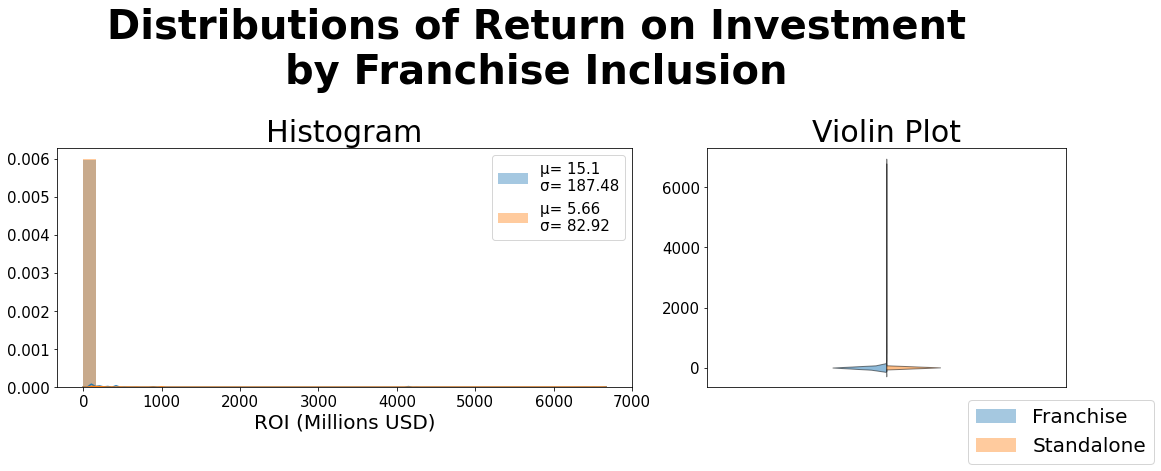

In [87]:
hist_violin('return_musd', 'Distributions of Return on Investment\nby Franchise Inclusion', 'ROI (Millions USD)')

### • Franchises have a higher average return on investment than stand-alone movies.
### • Franchises distribution has a "fatter" tail than stand-alone movies distribution.

## Franchise vs. Stand-alone: Movie Budget

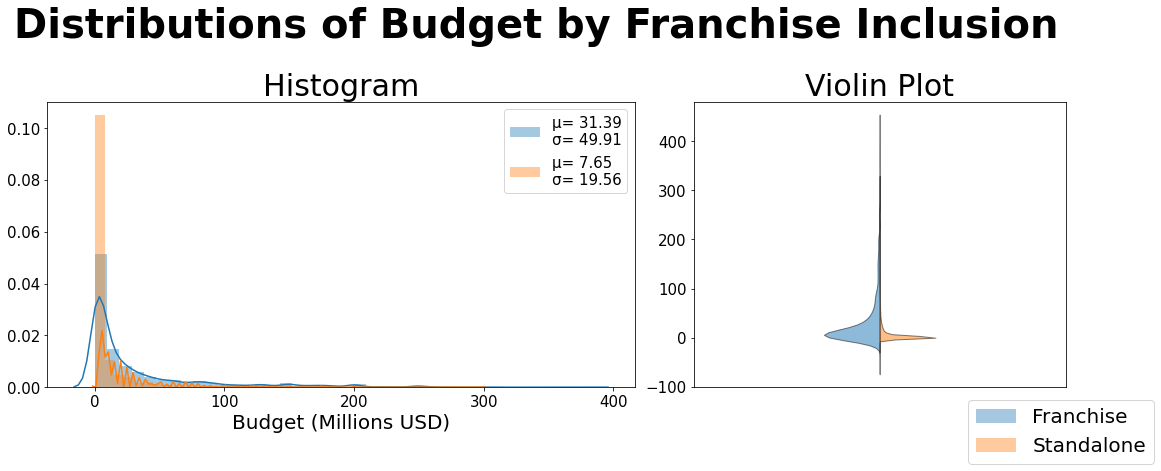

In [88]:
hist_violin('budget_musd', 'Distributions of Budget by Franchise Inclusion', 'Budget (Millions USD)')

### • Franchises have a higher budget on average than stand-alone movies, which is to be expected due to previous movie successes in a franchise.

## Franchise vs. Stand-alone: Movie Popularity

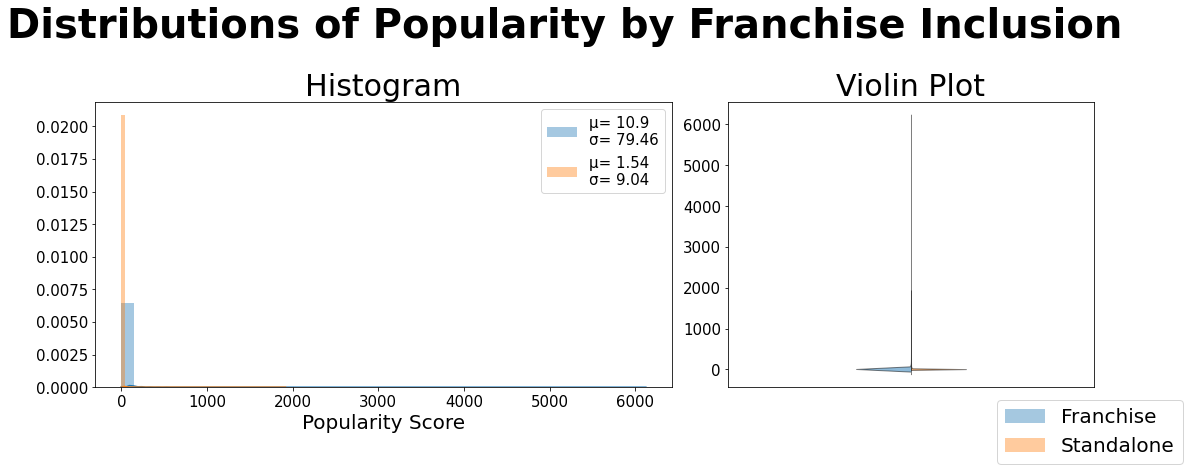

In [89]:
hist_violin('popularity', 'Distributions of Popularity by Franchise Inclusion', 'Popularity Score')

### • Franchises have a higher popularity score on average than stand-alone movies.

## Franchise vs. Stand-alone: Average Rating

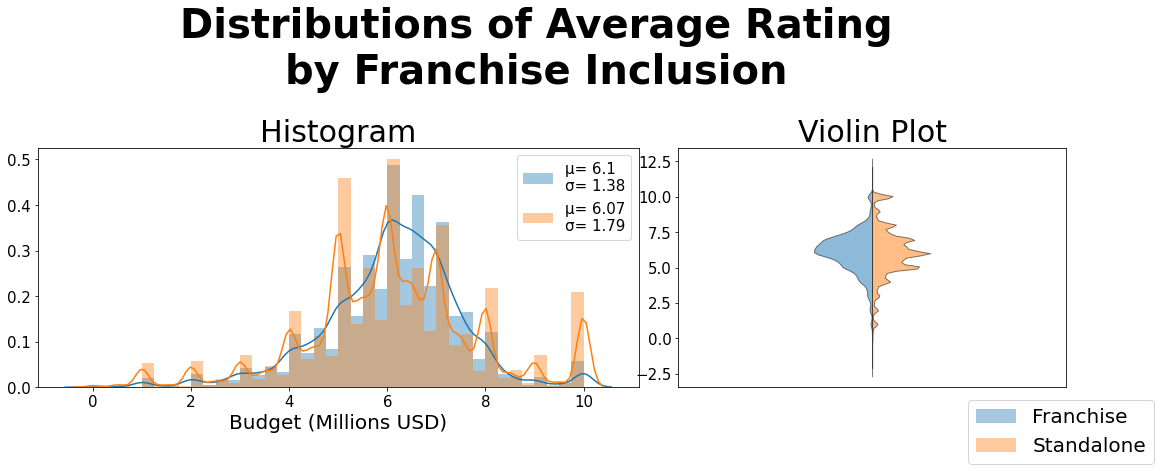

In [90]:
hist_violin('vote_average', 'Distributions of Average Rating\nby Franchise Inclusion', 'Budget (Millions USD)')

### • The average rating for both franchises and stand-alone movies is very similar.

# What Are the Most Successful Franchises?
### • In this section, we will compare franchises based on movie count, revenue, vote average, and return on investment.

In [91]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "return_musd":"median", 
                                                      "vote_count":"sum"})

franchises.head()                                                

title budget_musd      revenue_musd      vote_average  \
                      count         sum mean          sum mean         mean   
belongs_to_collection                                                         
#TemanTapiMenikah         2        0.00  NaN         0.00  NaN         7.15   
#TubeClash                3        0.00  NaN         0.00  NaN         7.33   
'Missing' Collection      6        0.00  NaN         0.00  NaN         3.25   
'Saturn' Collection       3        0.00  NaN         0.00  NaN         6.50   
... Blood Collection      2        0.00  NaN         0.00  NaN         5.15   

                      popularity return_musd vote_count  
                            mean      median        sum  
belongs_to_collection                                    
#TemanTapiMenikah           1.63         NaN         11  
#TubeClash                  0.85         NaN          5  
'Missing' Collection        0.90         NaN          9  
'Saturn' Collection         0.87         NaN          4  
... Blood Collection        2.05         NaN         35

In [92]:
# Creating a function to plot the grouped and aggregated dataframe
def plot_groupby(df, level1, level2, title='Top 10', min_votes=None, agg='mean',  x_axis_add=0):
    if min_votes:
        data = df.loc[df['vote_count',agg] > min_votes][level1,level2].sort_values(ascending=False).head(10)
    else:
        data = df[level1, level2].sort_values(ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(15,8))
    fig.suptitle(title, fontsize=30, fontweight='semibold')

    sns.barplot(data.values, data.index, orient='h')
    for i in range(len(data)):
        ax.text(data.values[i]* 1.01, i+0.05, format(np.round(data.values[i],2),','), fontsize=15, fontweight='semibold')
    ax.set_xlabel('Count', fontsize=20)
    ax.set_ylabel(None)
    ax.tick_params(labelsize=15)
    ax.set_xlim(0, ax.get_xlim()[1] + x_axis_add)
    fig.tight_layout()


## Top 10 Franchises by Movie Count

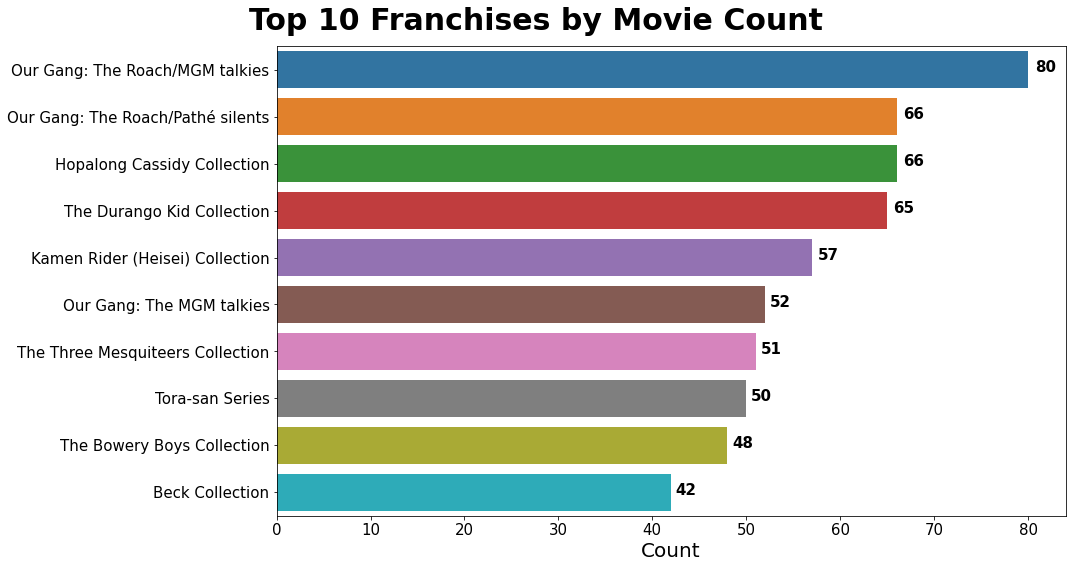

In [93]:
plot_groupby(franchises, 'title', 'count', 'Top 10 Franchises by Movie Count')

## Top 10 Franchises by Revenue Sum

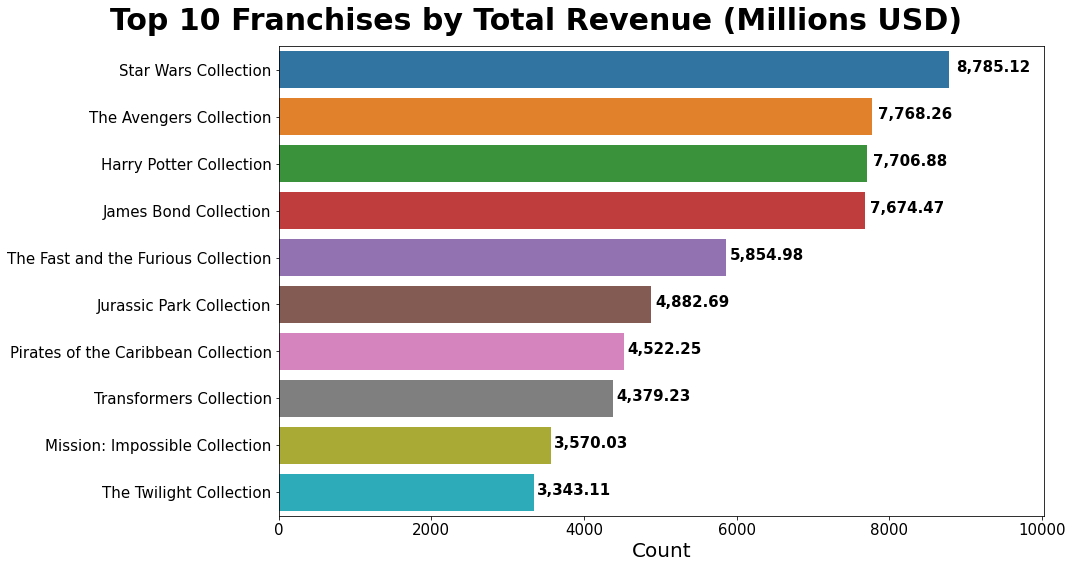

In [94]:
plot_groupby(franchises, 'revenue_musd', 'sum', 'Top 10 Franchises by Total Revenue (Millions USD)', min_votes=1000, agg='sum', x_axis_add=800)

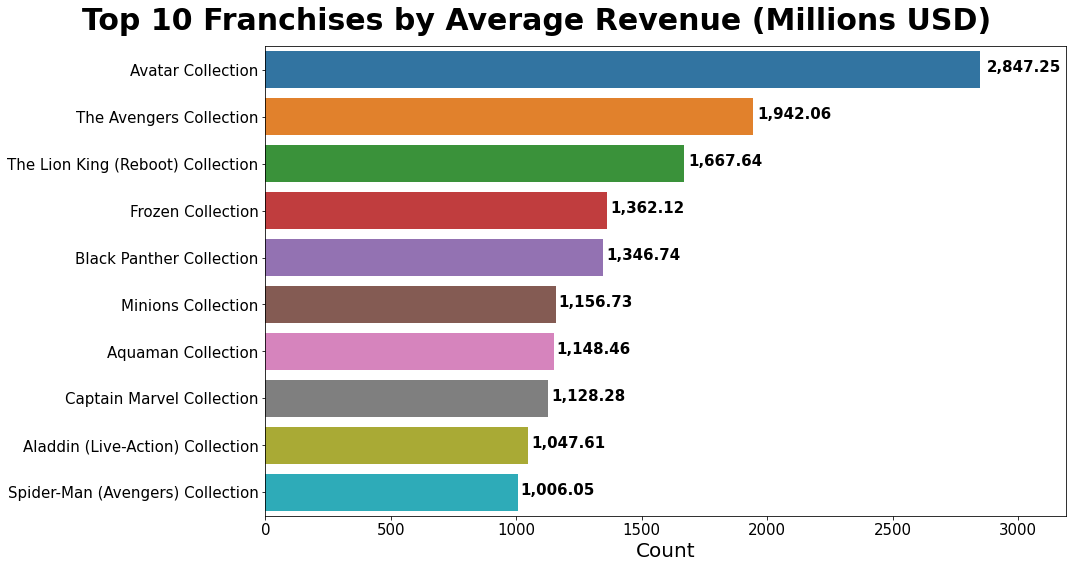

In [95]:
plot_groupby(franchises, 'revenue_musd', 'mean', 'Top 10 Franchises by Average Revenue (Millions USD)', min_votes=1000, agg='sum', x_axis_add=200)

## Top 10 Franchises by Budget Sum

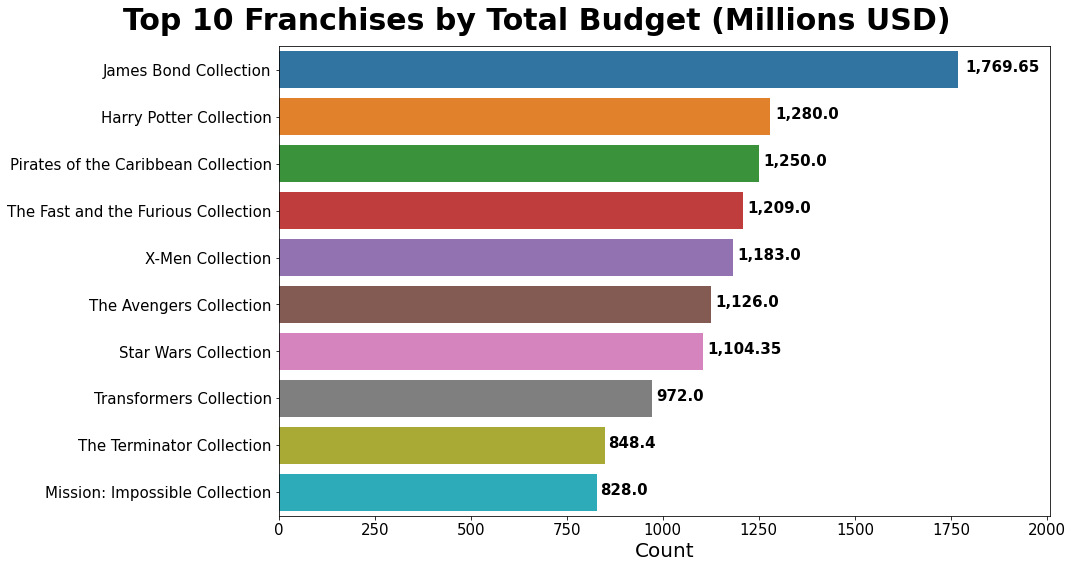

In [96]:
plot_groupby(franchises, 'budget_musd', 'sum', 'Top 10 Franchises by Total Budget (Millions USD)', x_axis_add=150)

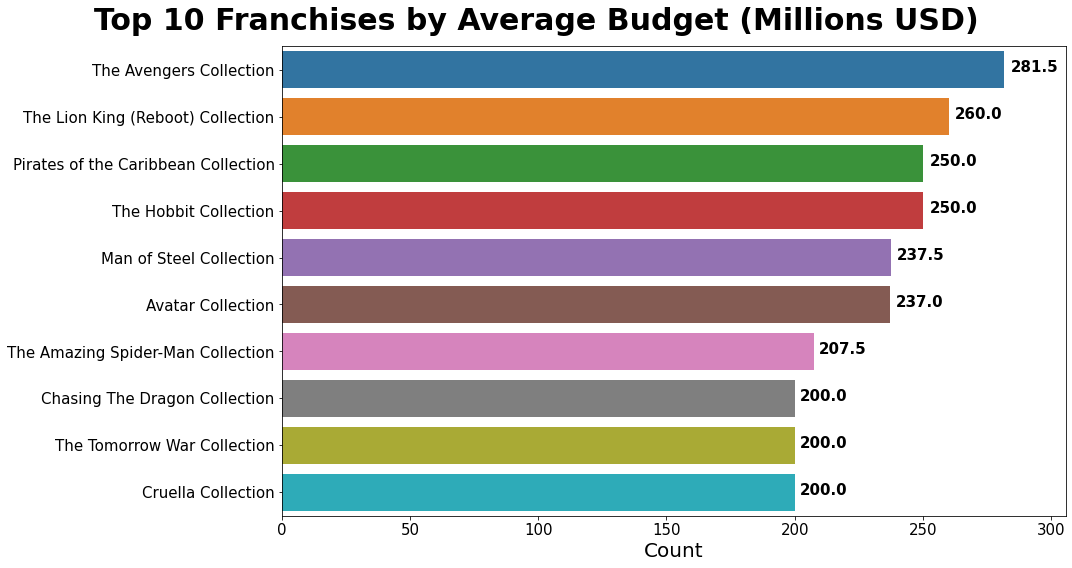

In [99]:
plot_groupby(franchises, 'budget_musd', 'mean', 'Top 10 Franchises by Average Budget (Millions USD)', x_axis_add=10)

## Top 10 Franchises by Vote Average

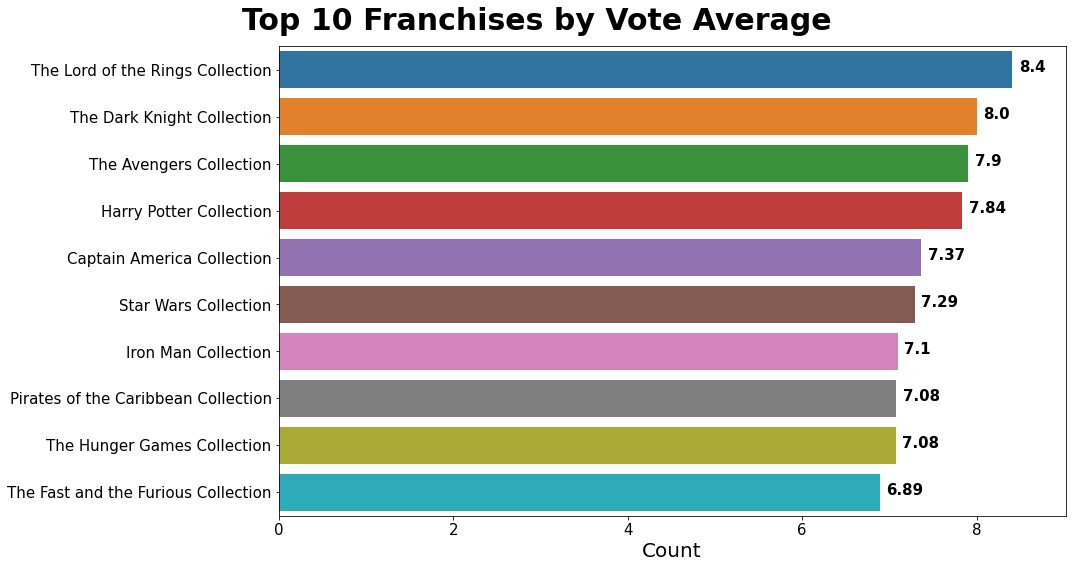

In [100]:
plot_groupby(franchises, 'vote_average', 'mean', 'Top 10 Franchises by Vote Average', min_votes=50000, agg='sum', x_axis_add=0.2)

# Who Are The Most Successful Directors?
### • In this section, we will compare directors based on movie count, vote average, profit, and revenue.

In [101]:
directors = df.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum", "profit_musd": ["mean", "sum"], "revenue_musd": ["mean", "sum"]})
directors.head()

title vote_average vote_count profit_musd       \
                    count         mean        sum        mean  sum   
director                                                             
 \tZhang Jing           3         4.00          1         NaN 0.00   
    Faris Kermani       3         6.90          4         NaN 0.00   
 Anna van Keimpema      3         4.80          2         NaN 0.00   
 Ariel Hassan           1         5.70          3         NaN 0.00   
 Barnaby Southcombe     2         6.20         34         NaN 0.00   

                    revenue_musd       
                            mean  sum  
director                               
 \tZhang Jing                NaN 0.00  
    Faris Kermani            NaN 0.00  
 Anna van Keimpema           NaN 0.00  
 Ariel Hassan                NaN 0.00  
 Barnaby Southcombe          NaN 0.00

## Top 10 Directors by Movie Count

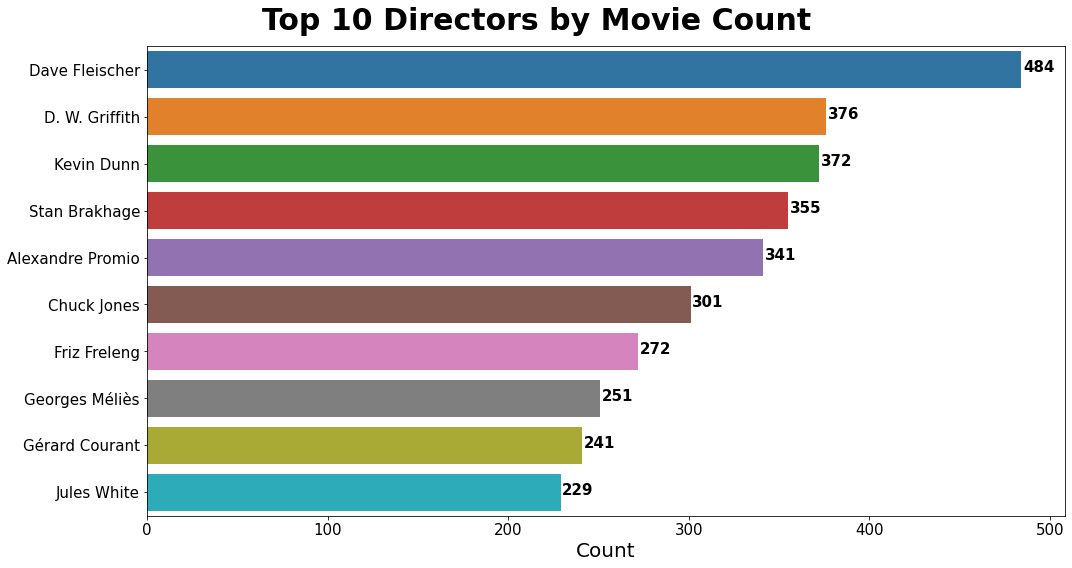

In [102]:
plot_top_10(df.director, 'Top 10 Directors by Movie Count')

## Top 10 Directors by Revenue

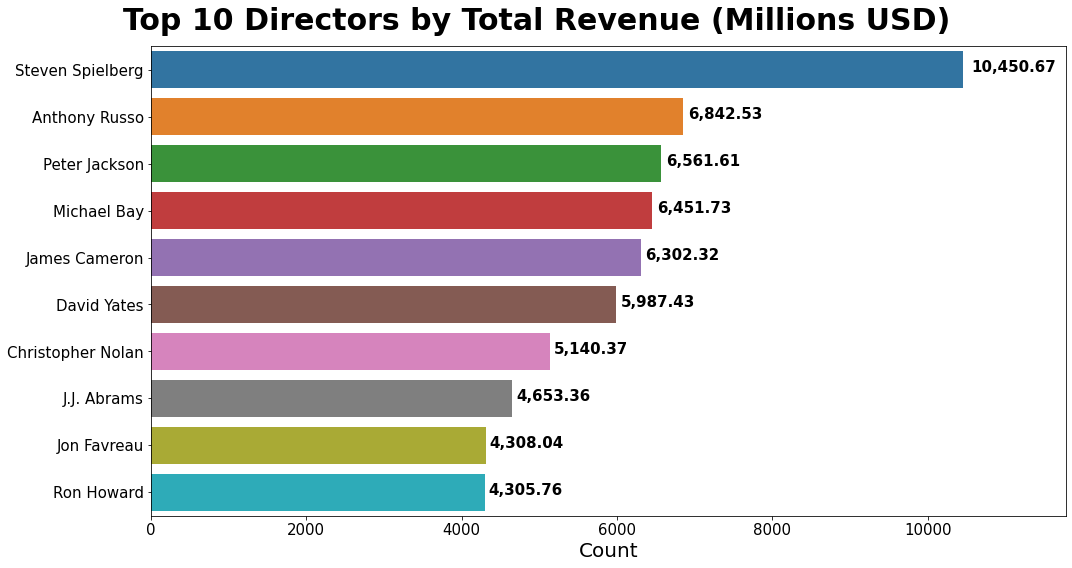

In [103]:
plot_groupby(directors, 'revenue_musd', 'sum', title='Top 10 Directors by Total Revenue (Millions USD)', x_axis_add=800)

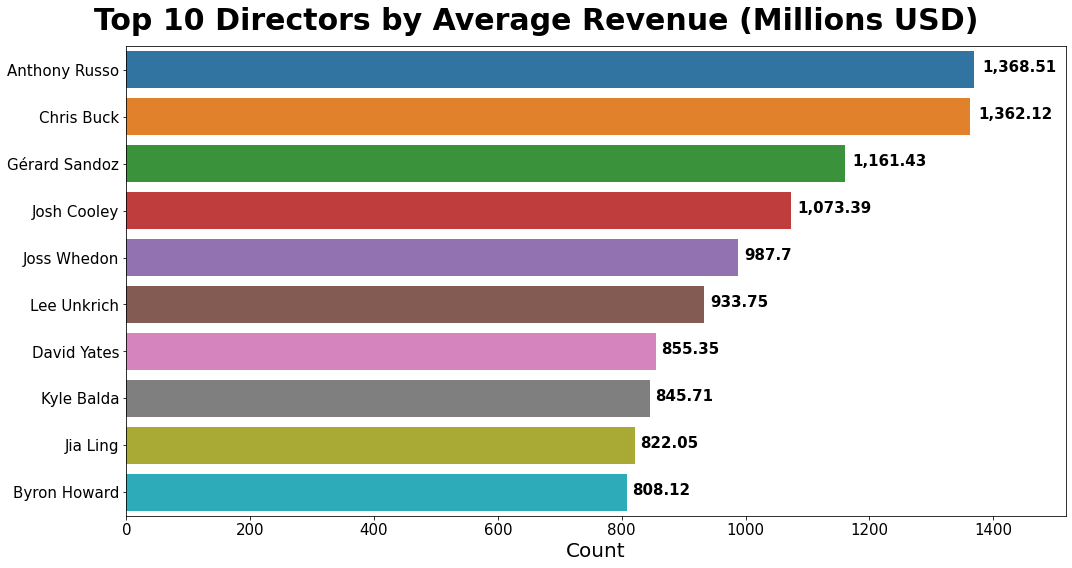

In [104]:
plot_groupby(directors, 'revenue_musd', 'mean', title='Top 10 Directors by Average Revenue (Millions USD)', x_axis_add=80)

## Top 10 Directors by Vote Average

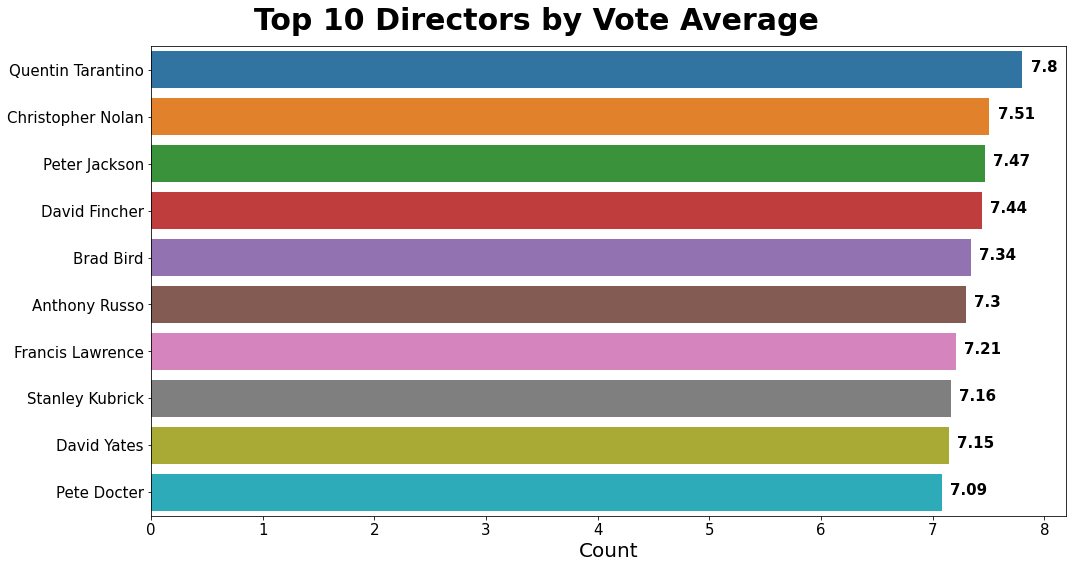

In [106]:
plot_groupby(directors, 'vote_average', 'mean', 'Top 10 Directors by Vote Average', min_votes=50000, agg='sum')

# What Are The Most Successful Genres?
### In this section, we will compare all the genres on vote average, popularity, profit, and revenue.

In [107]:
genres_df = df.copy()
genres_df['genres'] = genres_df['genres'].apply(lambda x: x.split('|') if type(x) != float else x)
genres_df = genres_df.explode('genres').groupby('genres').agg({"title": "count", "vote_average" :"mean", "vote_count": "sum", "popularity": "mean", "profit_musd": ["mean", "sum"], "revenue_musd": ["mean", "sum"]})
genres_df.head()

title vote_average vote_count popularity profit_musd            \
           count         mean        sum       mean        mean       sum   
genres                                                                      
Action     31207         5.80    5094608       6.19       77.07 168093.43   
Adventure  16703         6.01    4375508       7.31      128.49 179505.72   
Animation  32104         6.35    1626483       3.36      127.42  58614.13   
Comedy     94748         5.95    5112056       2.63       44.22 135352.19   
Crime      23057         5.99    2333957       3.65       32.84  42031.87   

          revenue_musd            
                  mean       sum  
genres                            
Action           94.04 267266.17  
Adventure       147.40 266347.06  
Animation       112.61  89524.45  
Comedy           47.22 221183.92  
Crime            44.07  75838.47

## Top 10 Genres by Movie Count

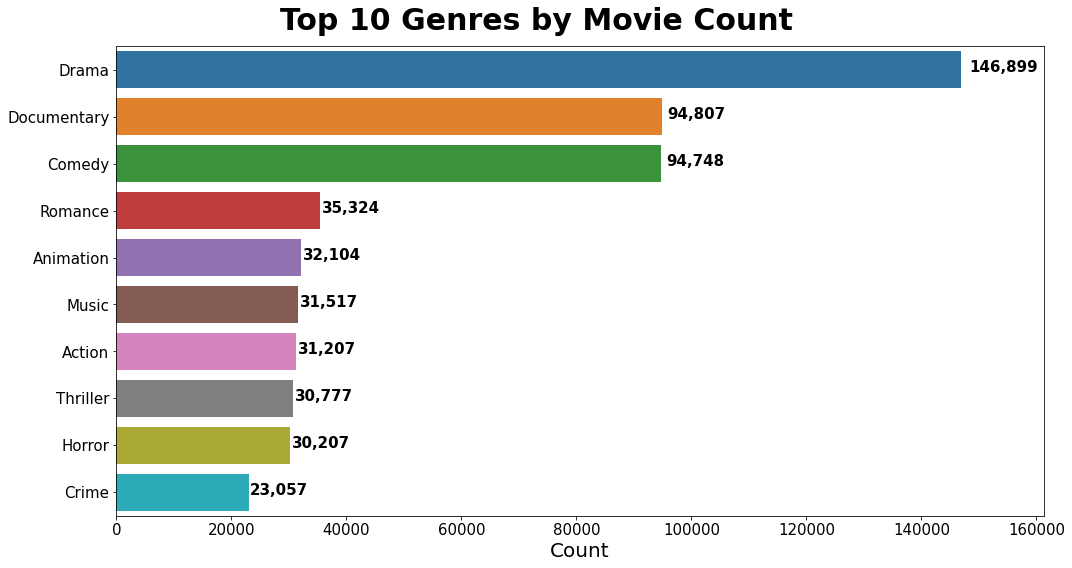

In [108]:
plot_groupby(genres_df, 'title', 'count', title='Top 10 Genres by Movie Count', x_axis_add=7000)

## Top 10 Genres by Revenue

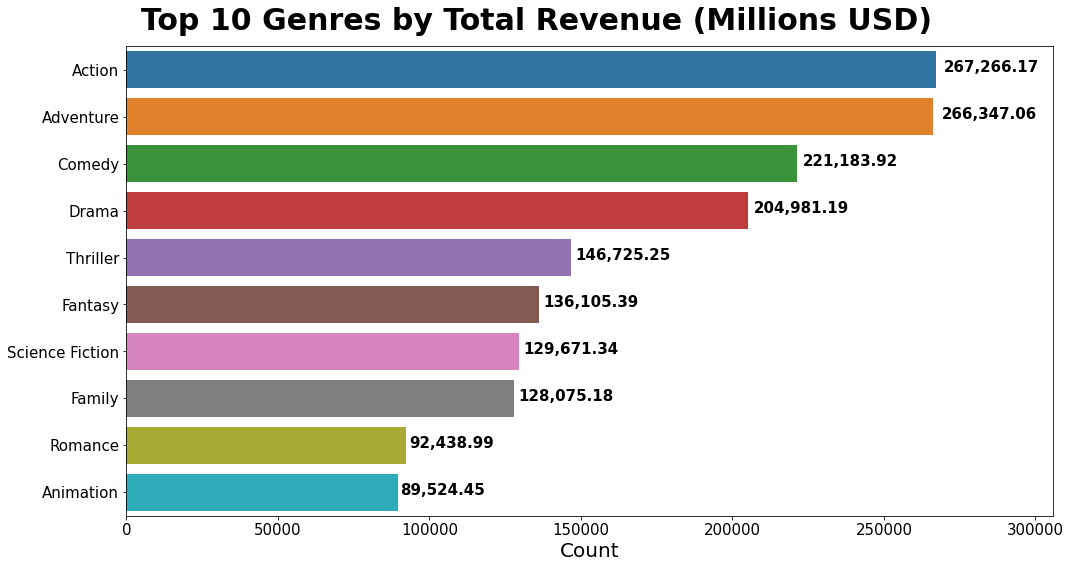

In [109]:
plot_groupby(genres_df, 'revenue_musd', 'sum', title='Top 10 Genres by Total Revenue (Millions USD)', min_votes=1000, agg='sum', x_axis_add=25000)

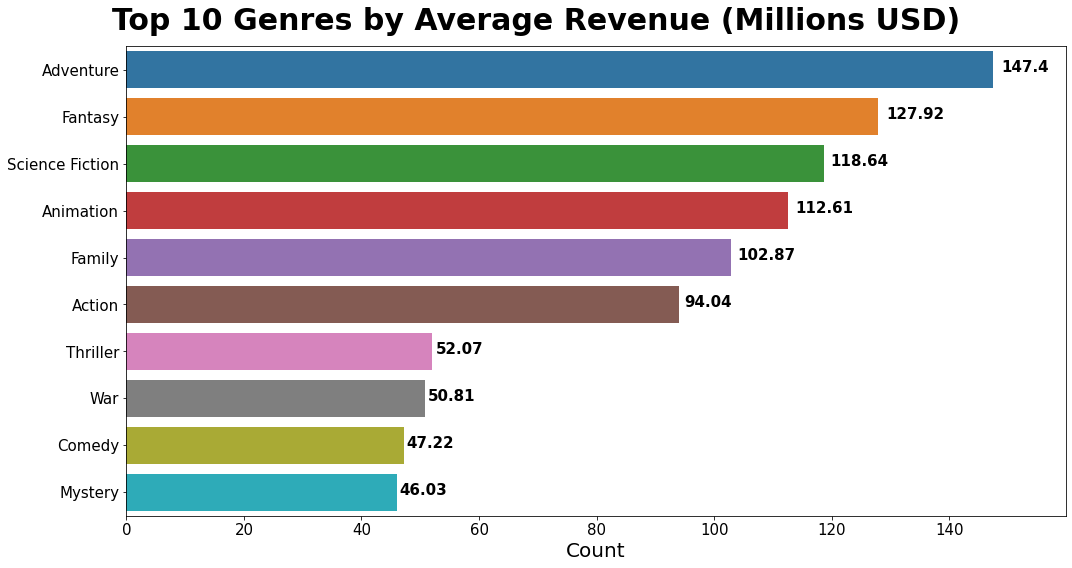

In [110]:
plot_groupby(genres_df, 'revenue_musd', 'mean', title='Top 10 Genres by Average Revenue (Millions USD)', min_votes=1000, agg='sum', x_axis_add=5)

## Top 10 Genres by Vote Average

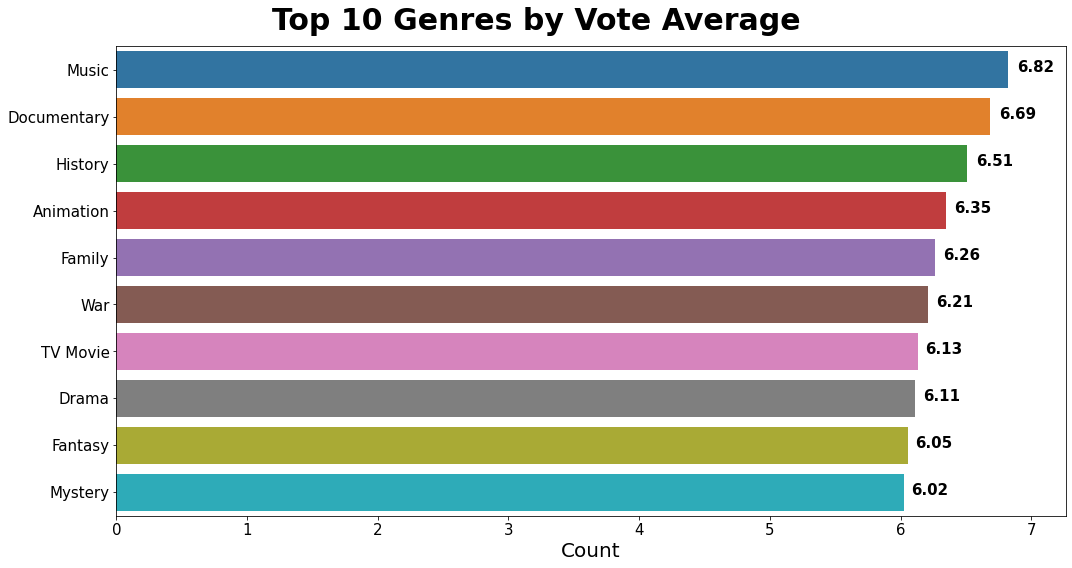

In [111]:
plot_groupby(genres_df, 'vote_average', 'mean', title='Top 10 Genres by Vote Average', x_axis_add=0.1, min_votes=50000, agg='sum')

# What Are The Most Successful Production Companies?
### • In this section, we will compare production companies based on movie count, revenue, and popularity.

In [112]:
production_df = df.copy()
production_df['company'] = production_df['production_companies'].apply(lambda x: x.split('|') if type(x) != float else x)
production_df = production_df.explode('company').groupby('company').agg({"title": "count", "vote_average" :"mean", "vote_count": "sum", "popularity": "mean", "profit_musd": ["mean", "sum"], "revenue_musd": ["mean", "sum"]})
production_df.head()

title vote_average vote_count popularity  \
                            count         mean        sum       mean   
company                                                                
 Fonds Bell                     1          NaN          0       0.60   
 Fonds des médias du Canada    12         6.49         61       1.75   
 Movie Studios                  2         5.50          4       1.97   
 NFB                         1710         6.20       3626       0.80   
 Sat1                           1         6.00          2       0.75   

                            profit_musd       revenue_musd       
                                   mean   sum         mean  sum  
company                                                          
 Fonds Bell                         NaN  0.00          NaN 0.00  
 Fonds des médias du Canada         NaN  0.00          NaN 0.00  
 Movie Studios                      NaN  0.00          NaN 0.00  
 NFB                              -0.51 -1.54         0.24 1.18  
 Sat1                               NaN  0.00          NaN 0.00

## Top 10 Production Companies by Total Movies

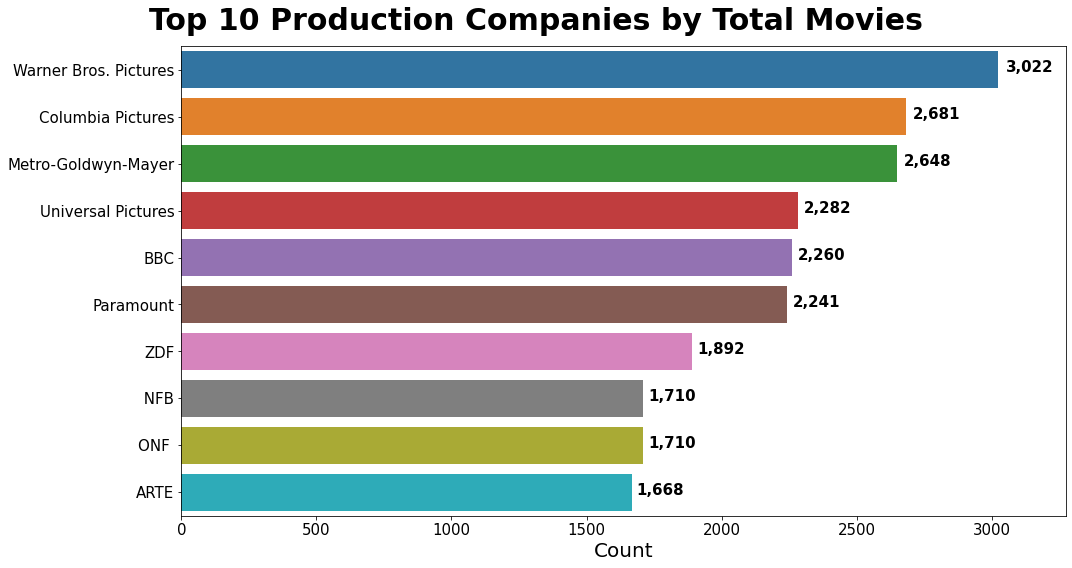

In [113]:
plot_groupby(production_df, 'title', 'count', title='Top 10 Production Companies by Total Movies', min_votes=1000, agg='sum', x_axis_add=100)

## Top 10 Production Companies by Vote Average

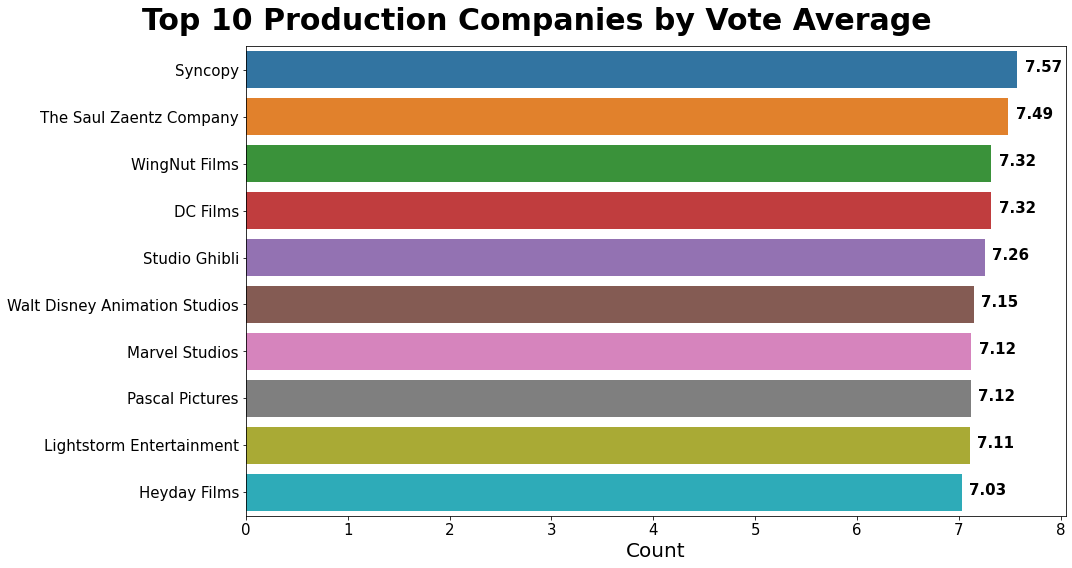

In [114]:
plot_groupby(production_df, 'vote_average', 'mean', title='Top 10 Production Companies by Vote Average', x_axis_add=0.1, min_votes=50000, agg='sum')

## Top 10 Production Companies by Average Popularity

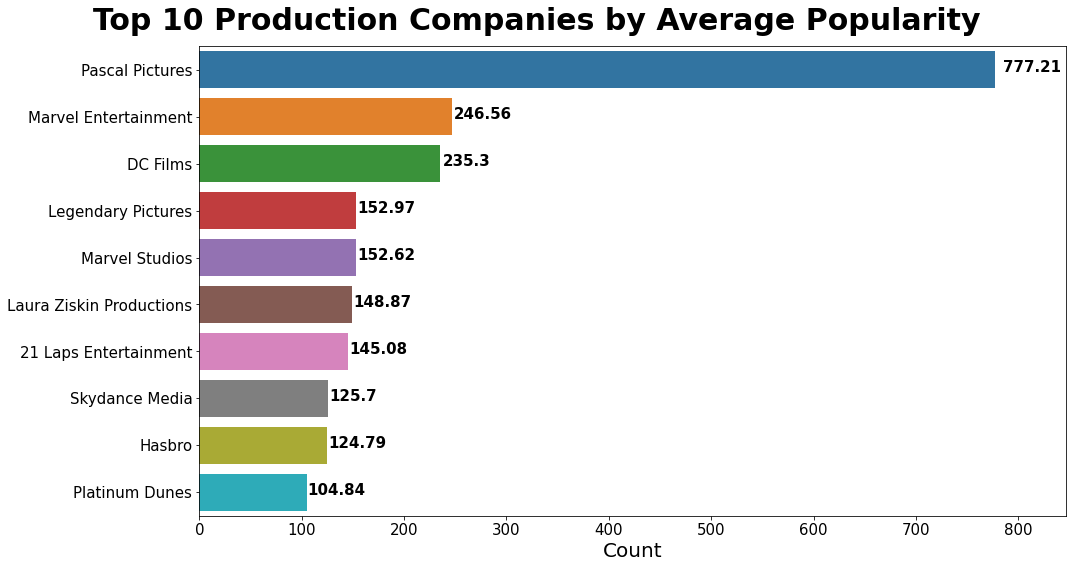

In [116]:
plot_groupby(production_df, 'popularity', 'mean', title='Top 10 Production Companies by Average Popularity', x_axis_add=30, min_votes=50000, agg='sum')

## Top 10 Production Companies by Profit

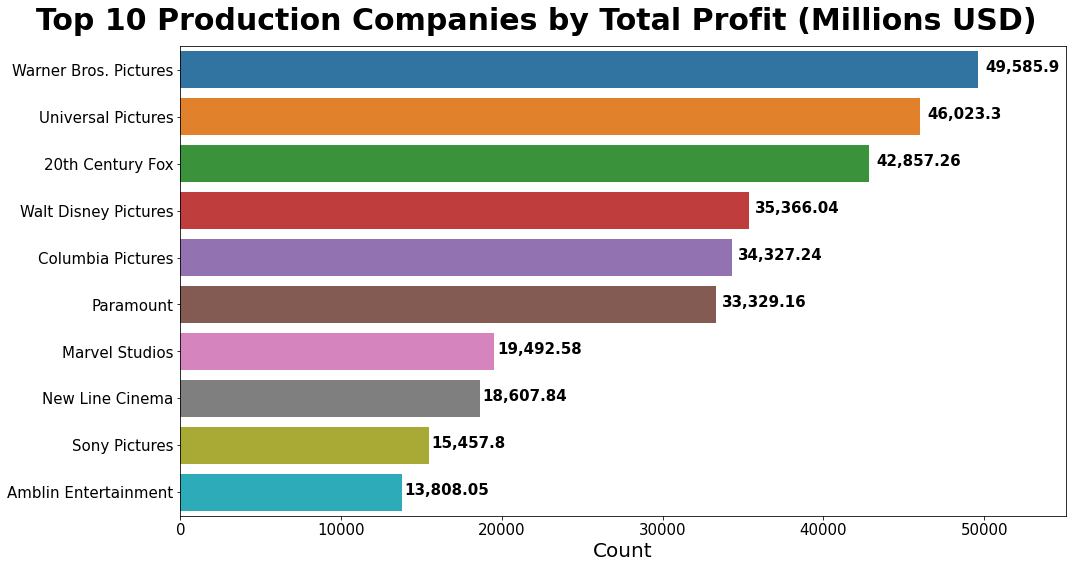

In [117]:
plot_groupby(production_df, 'profit_musd', 'sum', title='Top 10 Production Companies by Total Profit (Millions USD)', min_votes=1000, agg='sum', x_axis_add=3000)

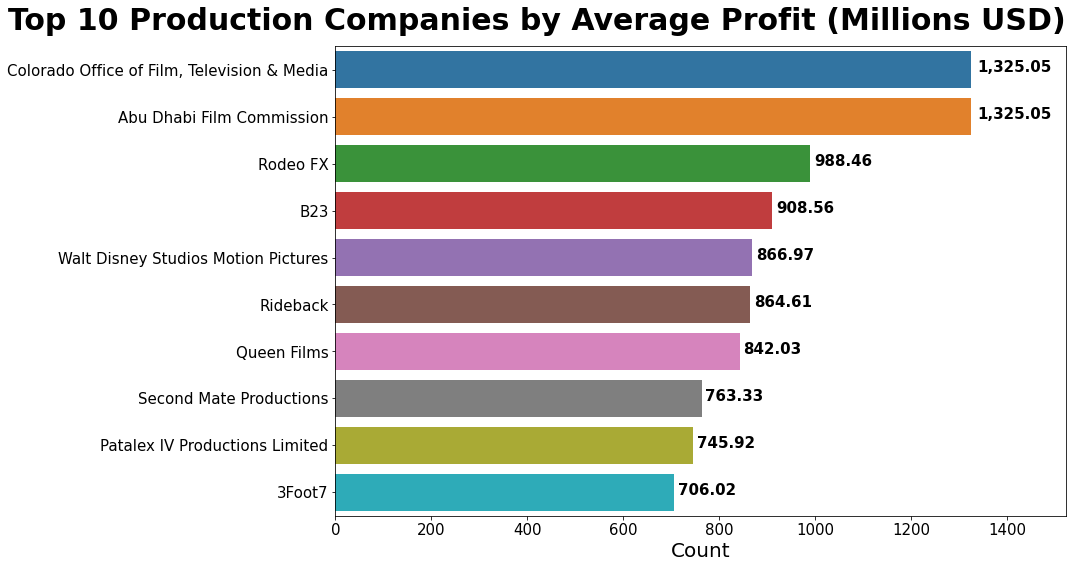

In [118]:
plot_groupby(production_df, 'profit_musd', 'mean', title='Top 10 Production Companies by Average Profit (Millions USD)', min_votes=1000, agg='sum', x_axis_add=130)

## Top 10 Production Companies by Revenue

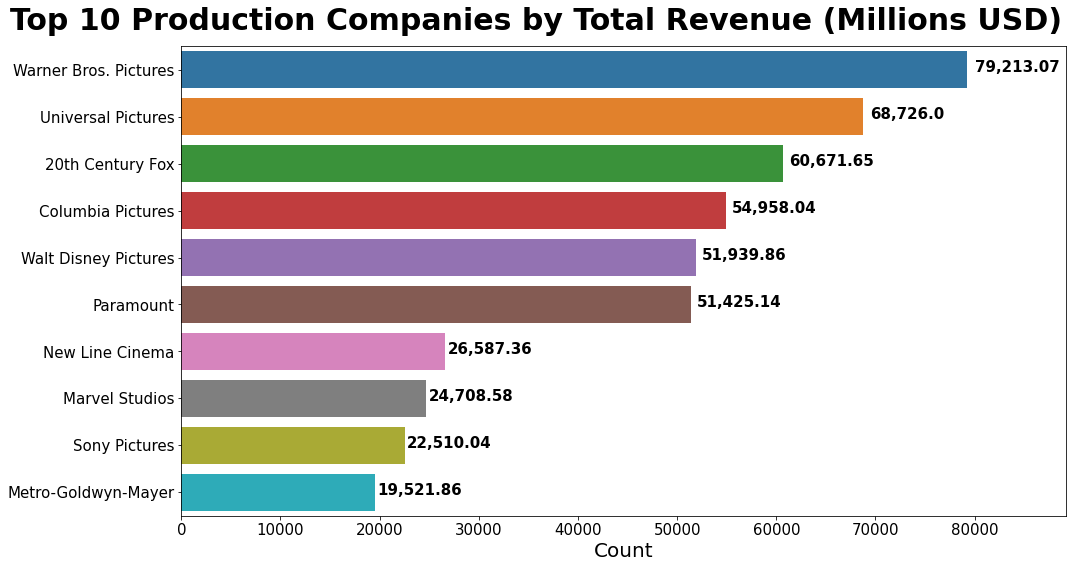

In [123]:
plot_groupby(production_df, 'revenue_musd', 'sum', title='Top 10 Production Companies by Total Revenue (Millions USD)', x_axis_add=6000, min_votes=50000, agg='sum')

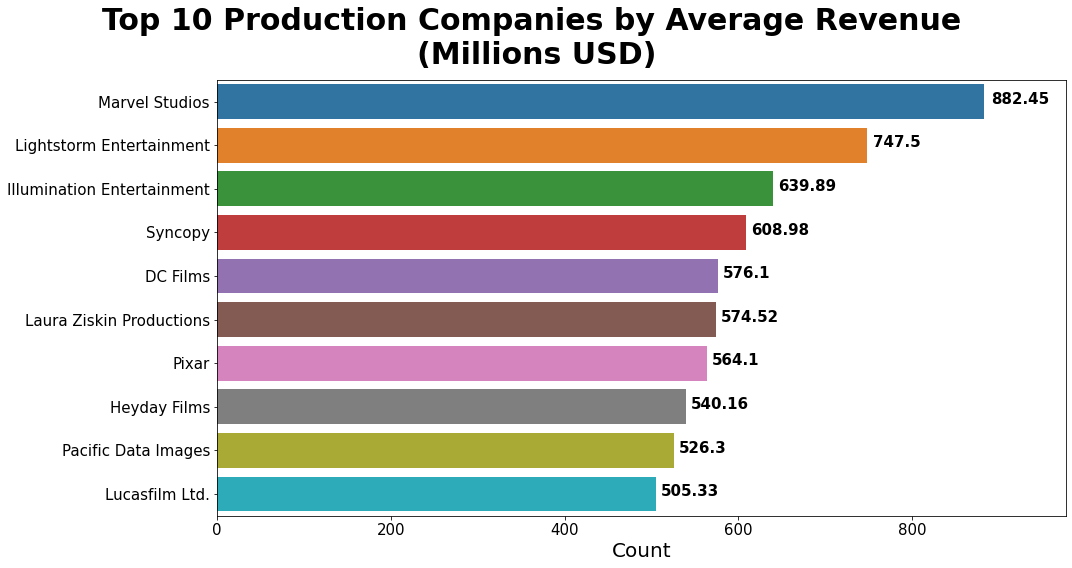

In [124]:
plot_groupby(production_df, 'revenue_musd', 'mean', title='Top 10 Production Companies by Average Revenue \n(Millions USD)', x_axis_add=50, min_votes=50000, agg='sum')

# Who Are The Most Successful Actors?
### • In this section, we will compare actors based on total movie count, revenue, popularity, and vote average.

In [126]:
actor = df.set_index('id').cast_names.str.split('|', expand=True)
actor = actor.stack().reset_index(level=1, drop=True).to_frame()
actor.columns = ['Actor']
actor.head()

,Actor
id,
3924,Penny Singleton
3924,Arthur Lake
3924,Larry Simms
3924,Daisy
3924,Ann Doran


In [127]:
actor = actor.merge(df[['title','revenue_musd','vote_average', 'vote_count', 'popularity']], how='left', left_index=True, right_index=True)
actor.head()

,Actor,title,revenue_musd,vote_average,vote_count,popularity
2,Turo Pajala,Love at Twenty,NaN,6.80,36.00,4.99
2,Susanna Haavisto,Love at Twenty,NaN,6.80,36.00,4.99
2,Matti Pellonpää,Love at Twenty,NaN,6.80,36.00,4.99
2,Eetu Hilkamo,Love at Twenty,NaN,6.80,36.00,4.99
2,Erkki Pajala,Love at Twenty,NaN,6.80,36.00,4.99


In [129]:
agg = actor.groupby('Actor').agg({
    'revenue_musd': ['sum', 'mean'],
    'vote_average': 'mean',
    'vote_count': 'sum',
    'popularity': 'mean',
    'title': 'count'
})

agg.head()

revenue_musd      vote_average vote_count popularity  \
                                sum mean         mean        sum       mean   
Actor                                                                         
                               0.00  NaN          NaN       0.00        NaN   
\t Corrado Fortuna             0.00  NaN          NaN       0.00       0.60   
\tBenoît B. Mandelbrot         0.00  NaN         4.60      11.00       1.79   
\tCirilo Fernández             0.00  NaN         3.80       2.00       1.23   
\tDouglas Hegdahl              1.30 1.30         6.60       5.00       3.45   

                       title  
                       count  
Actor                         
                           0  
\t Corrado Fortuna         1  
\tBenoît B. Mandelbrot     3  
\tCirilo Fernández         1  
\tDouglas Hegdahl          1

## Top 10 Actors by Total Movies

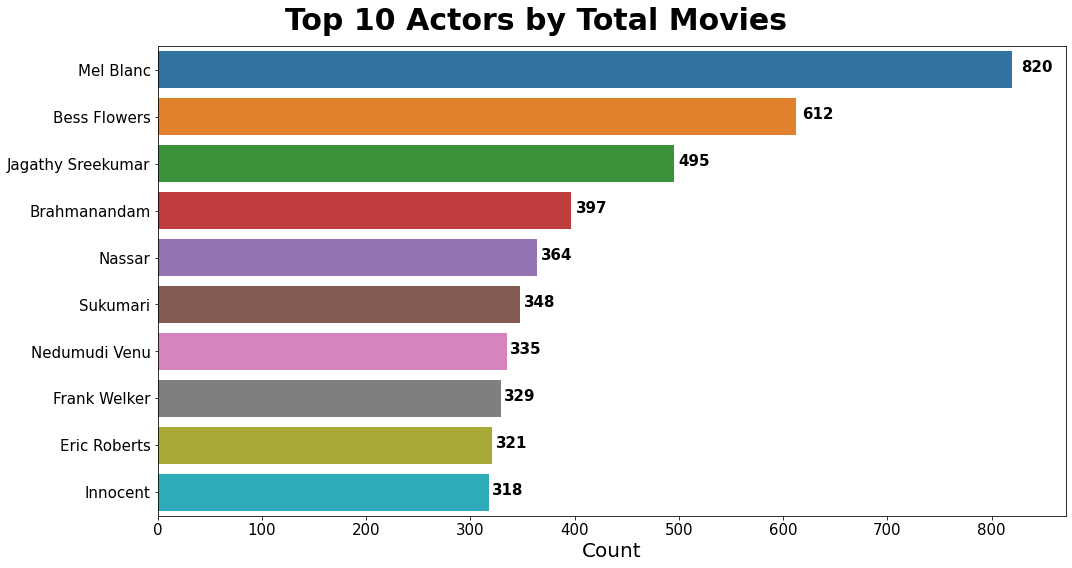

In [130]:
plot_groupby(agg, 'title', 'count', 'Top 10 Actors by Total Movies', min_votes=1000, agg='sum', x_axis_add=10)

## Top 10 Actors by Revenue

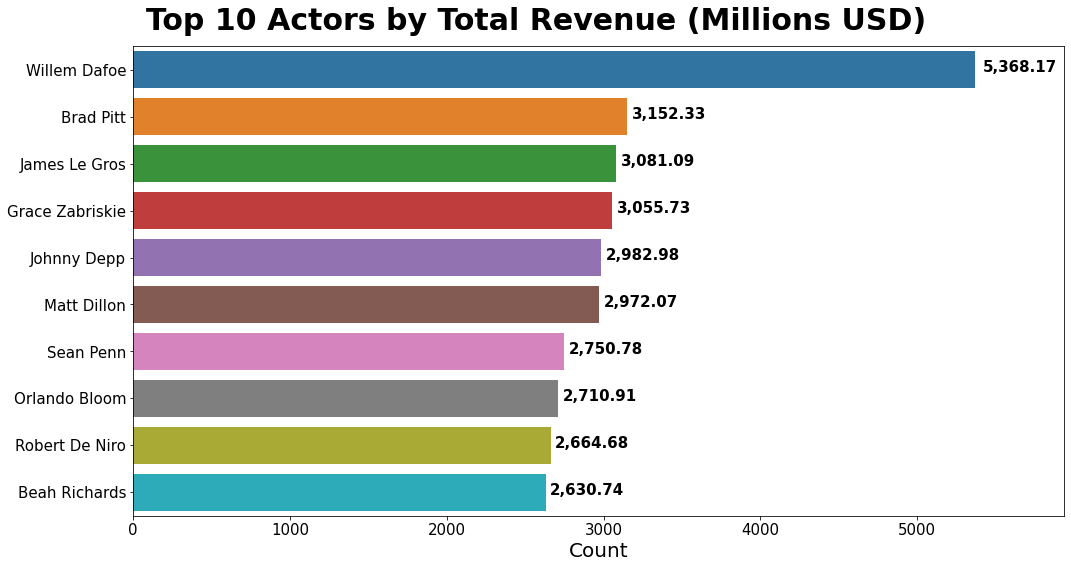

In [282]:
plot_groupby(agg, 'revenue_musd', 'sum', 'Top 10 Actors by Total Revenue (Millions USD)', min_votes=1000, agg='sum', x_axis_add=300)

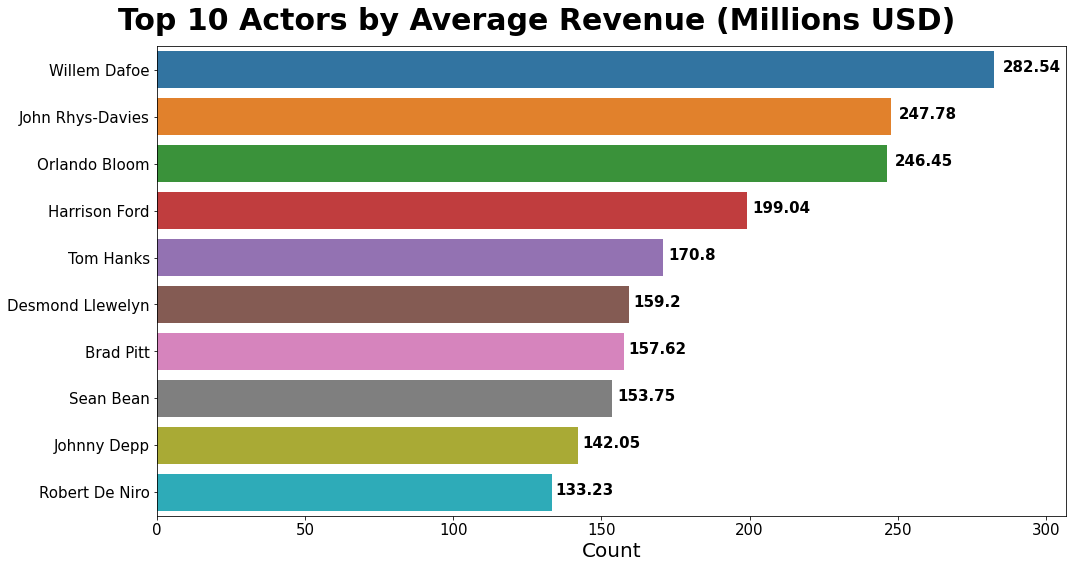

In [285]:
plot_groupby(agg, 'revenue_musd', 'mean', 'Top 10 Actors by Average Revenue (Millions USD)', min_votes=50000, agg='sum', x_axis_add=10)

## Top 10 Actors by Popularity

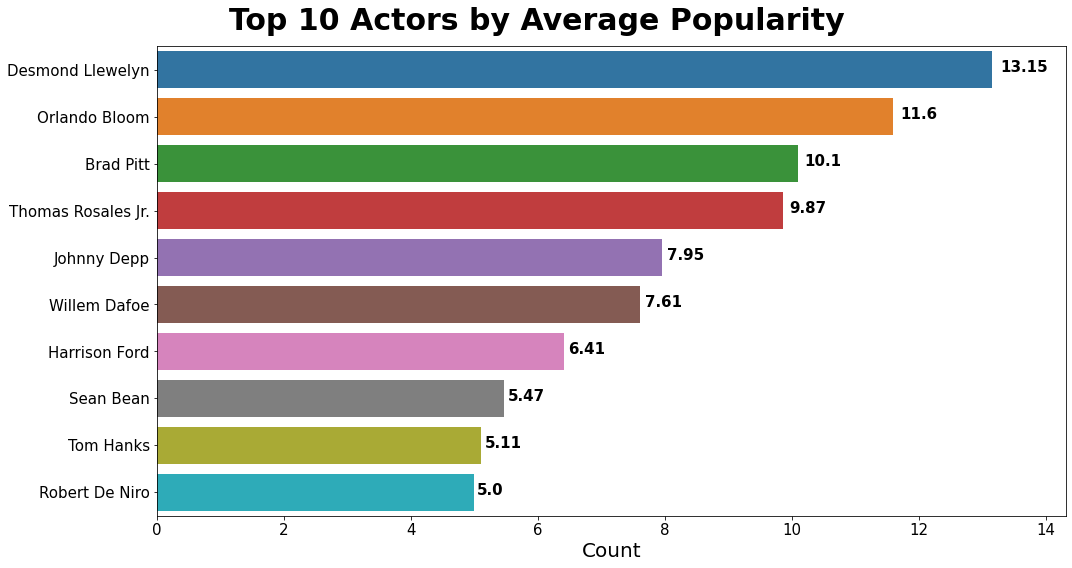

In [294]:
plot_groupby(agg, 'popularity', 'mean', 'Top 10 Actors by Average Popularity', min_votes=50000, agg='sum', x_axis_add=.5)

In [132]:
# Saving the updated dataframe to a csv file.
df.reset_index(drop=True, inplace=True)
df.drop('index', axis=1, inplace=True)
df.to_csv('movies_complete.csv', index=False)

### This concludes the Exploratory Data Analysis part of the project.
### In the next session, we will create our model based on movie attributes using Natural Language Processing.